# **Project Name**    -  **Unsupervised ML - Zomato Restaurant Clustering And Sentiment Analysis**


##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual

**Name** - Tanmay Gomase

# **Project Summary -**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.The project aimed to analyze a dataset from Zomato, a popular restaurant search and discovery service, for clustering and sentiment analysis. The dataset comprised restaurant information and customer reviews, presenting an opportunity to extract insights about customer preferences and sentiments.

The project was completed in following steps:

1.Loading the data and understanding variable characteristics.

2.Handling Null values and Duplicates

3.Data Wrangling making necessary manipulations on data.

4.Conducting Exploratory Data Analysis.

5.Hypothesis testing using statistical methods.

6.Feature Engineering and Data Preprocessing for clustering and NLP maipulations tasks.

7.Model implementations where we deploy Kmeans clustering, VADER and LinearRegression.

8.Conclusion

we endeavor to extract valuable insights that can inform strategic decisions and enhance user experience on the platform.

# **GitHub Link -**

https://github.com/Tanmayg17/unsupervised-ML-clustering-and-sentiment-analysis

# **Problem Statement**


The project seeks to analyze a dataset from Zomato, a renowned restaurant aggregator and food delivery service, focusing on clustering and sentiment analysis. The dataset comprises restaurant information and customer reviews, presenting an opportunity to extract insights into customer preferences and sentiments.

The primary objectives are twofold: first, to cluster restaurants based on shared characteristics.Second, to perform sentiment analysis on customer reviews, discerning prevailing sentiments towards different establishments to identify areas for improvement and capitalize on strengths.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Dataset Loading

In [2]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
restaurant_df = pd.read_csv('/content/drive/MyDrive/Zomato Restaurant names and Metadata.csv')

In [4]:
#Load 2nd data set
review_df = pd.read_csv('/content/drive/MyDrive/Zomato Restaurant reviews.csv')

### Dataset First View

In [5]:
# Dataset First Look
restaurant_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [6]:
# Dataset First Look
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [7]:
#rename the Restuarant column name
review_df.rename(columns={'Restaurant':'Name'}, inplace = True)

In [8]:
#Merge the two dataframes
merged_df = pd.merge(restaurant_df, review_df, on ='Name', how = 'inner')

In [9]:
#first look of merged dataframe
merged_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [10]:
# Dataset Rows & Columns count
print(f"The Rows and Columns count is dataset: Rows ={merged_df.shape[0]}, Columns ={merged_df.shape[1]}")

The Rows and Columns count is dataset: Rows =10000, Columns =12


### Dataset Information

In [11]:
# Dataset Info
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         10000 non-null  object
 1   Links        10000 non-null  object
 2   Cost         10000 non-null  object
 3   Collections  5000 non-null   object
 4   Cuisines     10000 non-null  object
 5   Timings      9900 non-null   object
 6   Reviewer     9962 non-null   object
 7   Review       9955 non-null   object
 8   Rating       9962 non-null   object
 9   Metadata     9962 non-null   object
 10  Time         9962 non-null   object
 11  Pictures     10000 non-null  int64 
dtypes: int64(1), object(11)
memory usage: 937.6+ KB


#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count
merged_df.duplicated().sum()

36

#### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count
# Missing Values/Null Values Count
print('Null Value Count in Each variable:\n')
print(merged_df.isnull().sum())
print('')
# Percentage of null values in each category
print('The Percentage of Null Value Count in each variable:\n')
null_count_percentage = merged_df.isnull().sum() / len(merged_df)
print(f"{null_count_percentage * 100}")

Null Value Count in Each variable:

Name              0
Links             0
Cost              0
Collections    5000
Cuisines          0
Timings         100
Reviewer         38
Review           45
Rating           38
Metadata         38
Time             38
Pictures          0
dtype: int64

The Percentage of Null Value Count in each variable:

Name            0.00
Links           0.00
Cost            0.00
Collections    50.00
Cuisines        0.00
Timings         1.00
Reviewer        0.38
Review          0.45
Rating          0.38
Metadata        0.38
Time            0.38
Pictures        0.00
dtype: float64


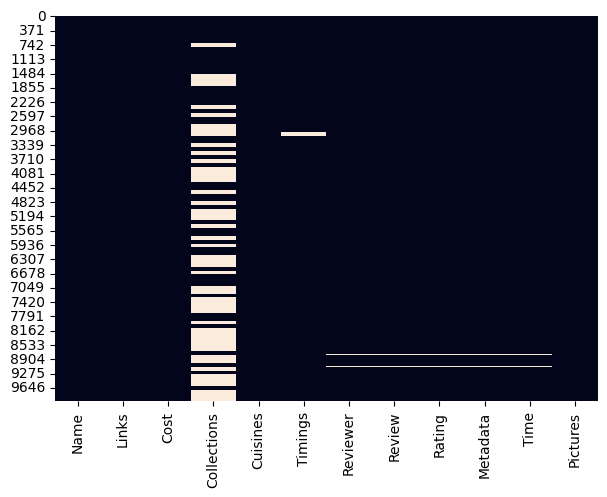

In [14]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
plt.figure(figsize=(7,5))
sns.heatmap(merged_df.isnull(), cbar = False)
plt.show()

### What did you know about your dataset?

Initially, we were given two datasets of Zomato restaurant names and reviews. To continue with the analysis, we renamed one column in the reviews dataset and merged the two dataframes.

The merged DataFrame consists of 10000 rows and 12 columns. It has 36 duplicate observations and null values in certain columns. We will deal with these in the Data Wrangling section. The dataset is a great resource for clustering and sentiment analysis.

## ***2. Understanding Your Variables***

In [15]:
# finding column names of dataset using .column
merged_df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings',
       'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures'],
      dtype='object')

In [16]:
# describe generate a descriptive statistical summary of the DataFrame
merged_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,10000,100,Beyond Flavours,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Links,10000,100,https://www.zomato.com/hyderabad/beyond-flavou...,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cost,10000,28,500,1200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Collections,5000,42,Food Hygiene Rated Restaurants in Hyderabad,400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cuisines,10000,89,"North Indian, Chinese",400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Timings,9900,74,12 Noon to 12 Midnight,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reviewer,9962,7446,Parijat Ray,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Review,9955,9364,good,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9962,10,5,3832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Metadata,9962,2477,1 Review,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description

The variable Description of Zomato's Dataset:

**Name:** Name of Restaurants

**Links:** URL Links of Restaurants

**Cost:** Per person estimated cost of dining

**Collections:** Tagging of Restaurants w.r.t Zomato categories

**Cuisines:** Cuisines served by restaurants

**Timings:** Restuarants Timings

**Reviewer:** Name of the reviewer

**Review:** Review text

**Rating:** Rating provided

**Metadata:** Reviewer metadata - No pf reviews and Followers

**Time:** Date and Time of Review

**Pictures:** No of pictures posted with reviews

### Check Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.
for i in merged_df.columns.to_list():
  print(f"No. of unique values in {i} : {merged_df[i].nunique()}.")

No. of unique values in Name : 100.
No. of unique values in Links : 100.
No. of unique values in Cost : 28.
No. of unique values in Collections : 42.
No. of unique values in Cuisines : 89.
No. of unique values in Timings : 74.
No. of unique values in Reviewer : 7446.
No. of unique values in Review : 9364.
No. of unique values in Rating : 10.
No. of unique values in Metadata : 2477.
No. of unique values in Time : 9782.
No. of unique values in Pictures : 36.


## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
# Write your code to make your dataset analysis ready.
#checking data types of variables
merged_df.dtypes

Name           object
Links          object
Cost           object
Collections    object
Cuisines       object
Timings        object
Reviewer       object
Review         object
Rating         object
Metadata       object
Time           object
Pictures        int64
dtype: object

In [19]:
#write function to remove any non-numeric characters
def clean_cost(value):
  if pd.isnull(value):
    return value
  return re.sub(r'[^\d.]','',value)

In [20]:
# Apply the function to the 'Cost' column
merged_df['Cost'] = merged_df['Cost'].apply(clean_cost)
#convert to numeric
merged_df['Cost'] = pd.to_numeric(merged_df['Cost'])

In [21]:
#checking different ratings
merged_df['Rating'].value_counts()

Rating
5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: count, dtype: int64

In [22]:
#convert Rating to numeric datatype
merged_df['Rating'] = pd.to_numeric(merged_df['Rating'], errors ='coerce')

In [23]:
#convert Time to datetime format
merged_df['Time'] = pd.to_datetime(merged_df['Time'])

In [24]:
#checking datatypes again
merged_df.dtypes

Name                   object
Links                  object
Cost                    int64
Collections            object
Cuisines               object
Timings                object
Reviewer               object
Review                 object
Rating                float64
Metadata               object
Time           datetime64[ns]
Pictures                int64
dtype: object

In [25]:
#handling duplicates
merged_df.duplicated().sum()

36

In [26]:
#finding which values are duplicates
merged_df[merged_df.duplicated()]

,Name,Links,Cost,Collections,Cuisines,Timings,Reviewer,Review,Rating,Metadata,Time,Pictures
8778,American Wild Wings,https://www.zomato.com/hyderabad/american-wild...,600,Food Hygiene Rated Restaurants in Hyderabad,"American, Fast Food, Salad, Burger",12 Noon to 4 AM,NaN,NaN,NaN,NaN,NaT,0
8779,American Wild Wings,https://www.zomato.com/hyderabad/american-wild...,600,Food Hygiene Rated Restaurants in Hyderabad,"American, Fast Food, Salad, Burger",12 Noon to 4 AM,NaN,NaN,NaN,NaN,NaT,0
8780,American Wild Wings,https://www.zomato.com/hyderabad/american-wild...,600,Food Hygiene Rated Restaurants in Hyderabad,"American, Fast Food, Salad, Burger",12 Noon to 4 AM,NaN,NaN,NaN,NaN,NaT,0
8781,American Wild Wings,https://www.zomato.com/hyderabad/american-wild...,600,Food Hygiene Rated Restaurants in Hyderabad,"American, Fast Food, Salad, Burger",12 Noon to 4 AM,NaN,NaN,NaN,NaN,NaT,0
8782,American Wild Wings,https://www.zomato.com/hyderabad/american-wild...,600,Food Hygiene Rated Restaurants in Hyderabad,"American, Fast Food, Salad, Burger",12 Noon to 4 AM,NaN,NaN,NaN,NaN,NaT,0
8783,American Wild Wings,https://www.zomato.com/hyderabad/american-wild...,600,Food Hygiene Rated Restaurants in Hyderabad,"American, Fast Food, Salad, Burger",12 Noon to 4 AM,NaN,NaN,NaN,NaN,NaT,0
8784,American Wild Wings,https://www.zomato.com/hyderabad/american-wild...,600,Food Hygiene Rated Restaurants in Hyderabad,"American, Fast Food, Salad, Burger",12 Noon to 4 AM,NaN,NaN,NaN,NaN,NaT,0
8785,American Wild Wings,https://www.zomato.com/hyderabad/american-wild...,600,Food Hygiene Rated Restaurants in Hyderabad,"American, Fast Food, Salad, Burger",12 Noon to 4 AM,NaN,NaN,NaN,NaN,NaT,0
8786,American Wild Wings,https://www.zomato.com/hyderabad/american-wild...,600,Food Hygiene Rated Restaurants in Hyderabad,"American, Fast Food, Salad, Burger",12 Noon to 4 AM,NaN,NaN,NaN,NaN,NaT,0
8787,American Wild Wings,https://www.zomato.com/hyderabad/american-wild...,600,Food Hygiene Rated Restaurants in Hyderabad,"American, Fast Food, Salad, Burger",12 Noon to 4 AM,NaN,NaN,NaN,NaN,NaT,0


In [27]:
#droping duplicates to remove bias from our data
merged_df.drop_duplicates()

,Name,Links,Cost,Collections,Cuisines,Timings,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0
2,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0
3,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",2019-05-24 22:11:00,0
4,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,1000,NaN,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM",Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,"53 Reviews , 54 Followers",2016-06-05 00:08:00,0
9996,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,1000,NaN,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM",Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",2016-06-04 22:01:00,0
9997,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,1000,NaN,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM",Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",2016-06-03 10:37:00,3
9998,Chinese Pavilion,https://www.zomato.com/hyderabad/chinese-pavil...,1000,NaN,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM",Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,"13 Reviews , 144 Followers",2016-05-31 17:22:00,0


In [28]:
#handling null values
merged_df.isnull().sum()

Name              0
Links             0
Cost              0
Collections    5000
Cuisines          0
Timings         100
Reviewer         38
Review           45
Rating           39
Metadata         38
Time             38
Pictures          0
dtype: int64

In [29]:
#fillna to replace null values with unknown placeholder
merged_df['Collections'].fillna('Unknown', inplace = True)

In [30]:
#drop the null rows using dropna
to_drop = ['Timings','Reviewer', 'Review', 'Rating','Metadata','Time']
merged_df.dropna(subset = to_drop, inplace =True)

In [31]:
#check for null values again
merged_df.isnull().sum()

Name           0
Links          0
Cost           0
Collections    0
Cuisines       0
Timings        0
Reviewer       0
Review         0
Rating         0
Metadata       0
Time           0
Pictures       0
dtype: int64

In [32]:
#Extracting hour, day, month, year
merged_df['day'] = merged_df['Time'].dt.day_name()
merged_df['month'] = merged_df['Time'].dt.month_name()
merged_df['year'] = merged_df['Time'].dt.year
merged_df['hour'] = merged_df['Time'].dt.hour
merged_df['month_num'] = merged_df['Time'].dt.month
merged_df['day_num'] = merged_df['Time'].dt.day

In [33]:
#shape of new dataset
merged_df.shape

(9854, 18)

### What all manipulations have you done and insights you found?

Firt we will do type casting, datatype of 'cost' variable  was in object format we changed it to numeric similary datatype of 'Rating' variable was in object format we changed it to numeric. 'Time' variable was also in object format we changed it to datetime.

In second operation we handled duplicates there were only 36 in our dataset and all of them containing NaN values in  most of the columns.

In third operation we dealt with missing values,'Reviewer', 'Review', 'Rating', 'Metadata', 'Time' these columns were containing small amount of null values dropping them wont affect dataset, dropna pandas method is utilised.
For 'Collections' Column which has 50% null values dropping them will result in huge loss of data so using fillna pandas method we will replace null values with Unknown placeholder.

In fourth operation we extracted day name, month name, year and hour from 'Time' column.

The new shape of dataset after manipulation is 9854 rows and 16 columns.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

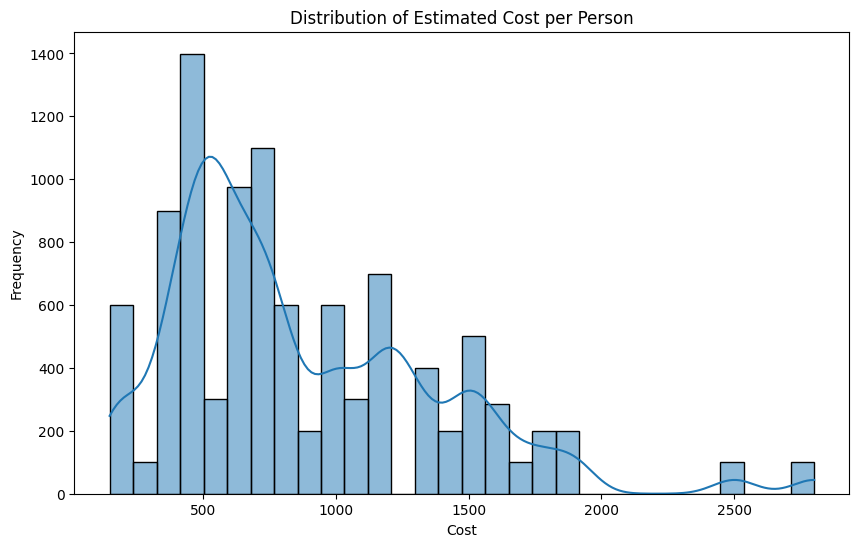

In [34]:
# Chart - 1 visualization code

#analyse distribution of estimated cost per person
plt.figure(figsize=(10, 6))
sns.histplot(x='Cost', data = merged_df, bins = 30, kde = True)
#define title and axes
plt.title('Distribution of Estimated Cost per Person')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

The Graph Shows us distribution of estimated cost per person.

##### 2. What is/are the insight(s) found from the chart?

The highest frequency of costs is centered around 500 and there is a noticeable decline in the number of restaurants as the cost per person increases beyond 1000.
The distribution suggests that the majority of restuarant options are relatively affordable, with most costs clustering below 1000.

We can also see presence of outliers in data after 2500.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Yes. Business can focus on **targeted marketing**, restaurants can tailor marketing campaigns to highlight value for money, which can attract a larger customer segment.**Market Expansion** there might be opportunities for new entrants to compete effectively in this segment.

 limited market for high-end dining is area of improvement and avoiding saturation in mid range price category.

#### Chart - 2

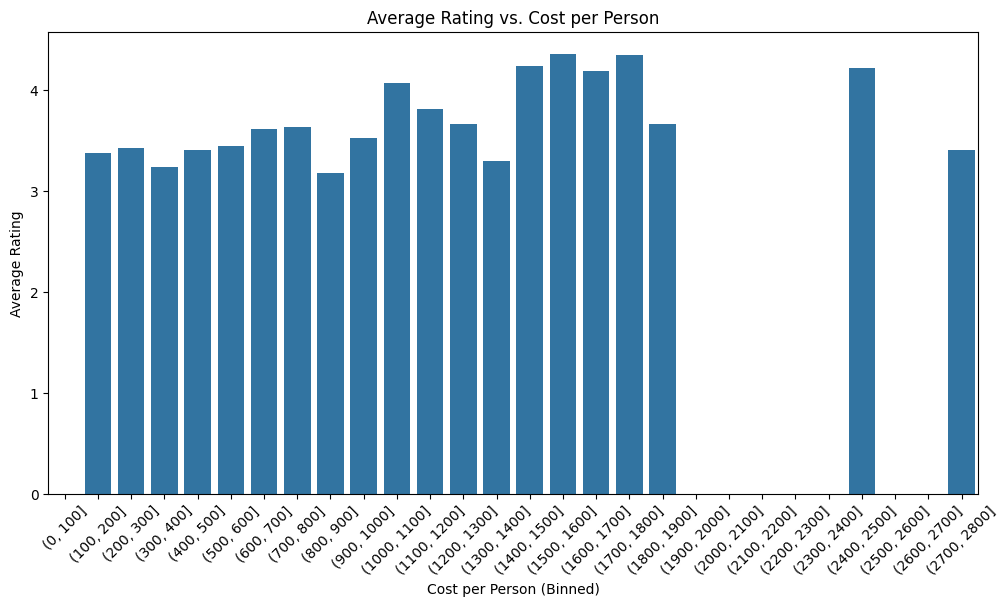

In [35]:
# Chart - 2 visualization code

# Create cost bins
merged_df['Cost_bin'] = pd.cut(merged_df['Cost'], bins=range(0, merged_df['Cost'].max() + 100, 100))

# Calculate the average rating for each cost bin
cost_rating = merged_df.groupby('Cost_bin')['Rating'].mean().reset_index()

plt.figure(figsize=(12, 6))
#plot bar chart
sns.barplot(x=cost_rating['Cost_bin'], y=cost_rating['Rating'])
plt.title('Average Rating vs. Cost per Person')
plt.xlabel('Cost per Person (Binned)')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

To find out relation between Cost and Rating, we create some Cost bins from Cost column and then plot bar chart.

##### 2. What is/are the insight(s) found from the chart?

Bars showing higher average ratings for higher cost bins suggest that customers are more satisfied with higher-priced restaurants.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Quality is a critical factor for customer satisfaction. Restaurants Should focus on maintaining high standards of food and service quality even at lower price points, potentially gaining a competitive edge in the budget-friendly segment.

The insight that cost bins from 1000-1100 to 1700-1800 have the highest average ratings indicates a strong customer satisfaction with high-end dining experiences.

#### Chart - 3

In [36]:
# Chart - 3 visualization code
#Find highest rated restaurants
rating_by_restaurant = merged_df.groupby('Name')['Rating'].mean().reset_index()

#sort restaurants by rating
sorted = rating_by_restaurant.sort_values(by='Rating', ascending = False)
print('The Top Rated Restaurant by Rating are:',sorted[:10])

The Top Rated Restaurant by Rating are:                                        Name  Rating
3                 AB's - Absolute Barbecues    4.88
11                                   B-Dubs    4.81
2            3B's - Buddies, Bar & Barbecue    4.76
67                                 Paradise    4.70
35                                 Flechazo    4.66
86                           The Indi Grill    4.60
96          Zega - Sheraton Hyderabad Hotel    4.45
64               Over The Moon Brew Company    4.34
16                          Beyond Flavours    4.28
19  Cascade - Radisson Hyderabad Hitec City    4.26


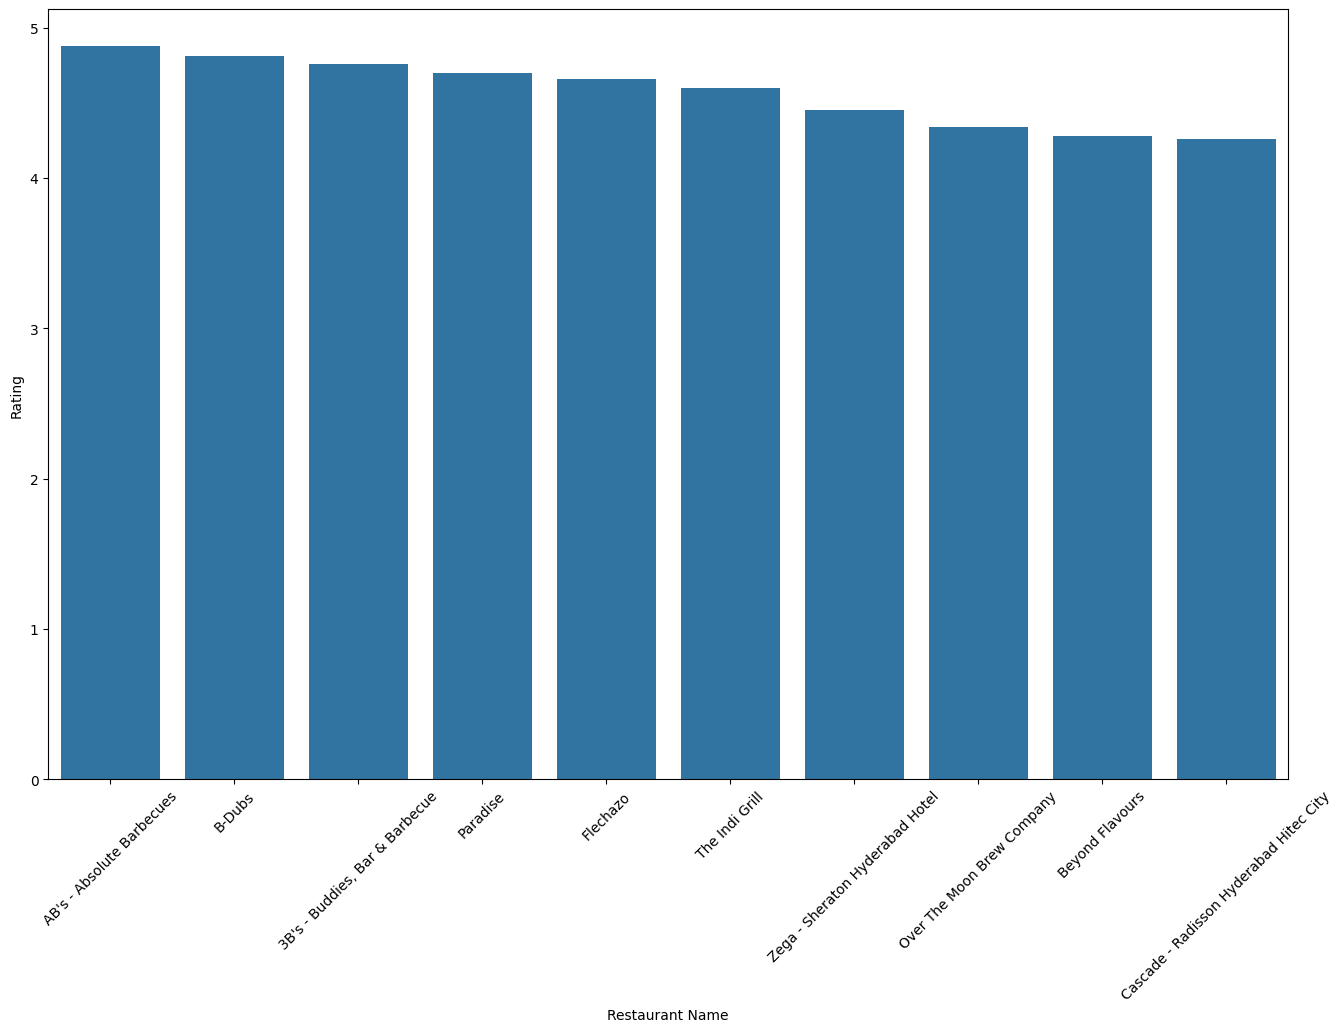

In [37]:
#plot bar chart of top 10 rated restaurants
plt.figure(figsize=(16,10))
sns.barplot(x = 'Name', y='Rating', data = sorted[:10])
#define axes and title
plt.xlabel('Restaurant Name')
plt.ylabel('Rating')
plt.xticks(rotation=45)
#display
plt.show()

##### 1. Why did you pick the specific chart?

To find out top 10 restaurants by rating, bar chart will be most appropriate.

##### 2. What is/are the insight(s) found from the chart?

**Ab's-Absolute Barbecues** is highest rated(4.88) restaurant in our dataset which is of Hyderabad city.
Follwed by B-Dubs, 3B's - Buddies, Bar & Barbecue, Paradise respectively.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. By identifying highest rated restaurants you can analyze the common factors contributing to their high ratings. These factors could include menu offerings, customer service, ambiance, and pricing strategies. Learning from these best practices can help other restaurants improve their own offerings to achieve higher customer satisfaction and ratings.

#### Chart - 4

In [38]:
# Chart - 4 visualization code
# Calculate the average cost per person for each restaurant
cost_by_restaurant = merged_df.groupby('Name')['Cost'].mean().reset_index()

# Sort restaurants by average cost in descending order
sorted_costs = cost_by_restaurant.sort_values(by='Cost', ascending=False)

# Print the top 10 most expensive restaurants
print('The Top Rated Restaurants by Cost are:')
print(sorted_costs[:10])

The Top Rated Restaurants by Cost are:
                                                 Name    Cost
22               Collage - Hyatt Hyderabad Gachibowli  2800.0
34                   Feast - Sheraton Hyderabad Hotel  2500.0
0                                   10 Downing Street  1900.0
46  Jonathan's Kitchen - Holiday Inn Express & Suites  1900.0
19            Cascade - Radisson Hyderabad Hitec City  1800.0
96                    Zega - Sheraton Hyderabad Hotel  1750.0
58              Mazzo - Marriott Executive Apartments  1700.0
8                                        Arena Eleven  1600.0
11                                             B-Dubs  1600.0
13                                    Barbeque Nation  1600.0


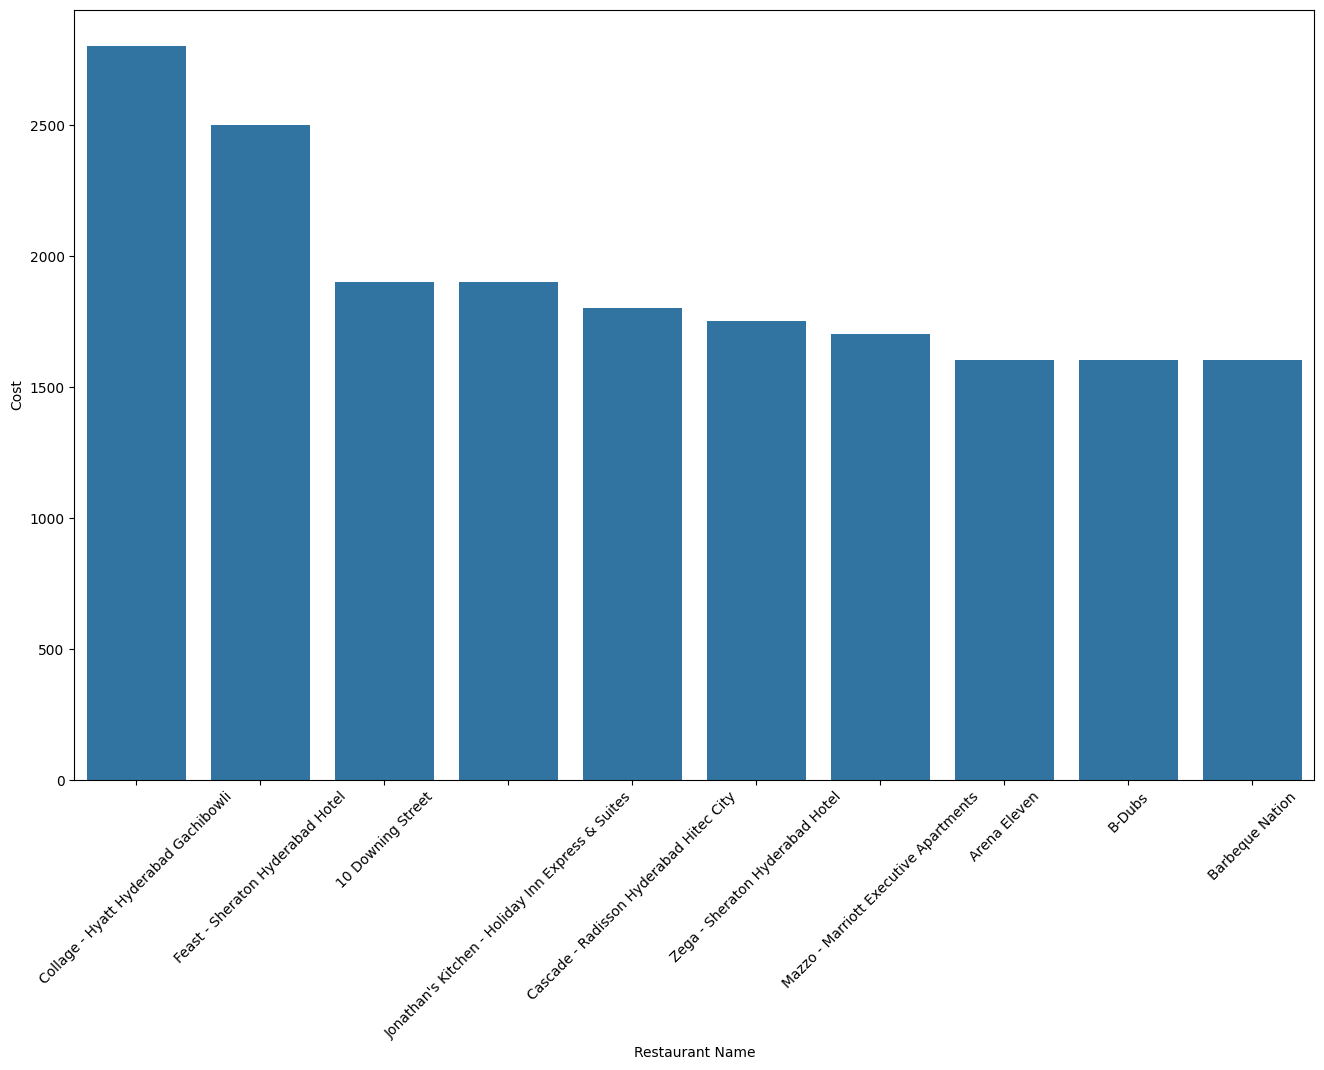

In [39]:
#plot bar chart of top 10 expensive restaurants
plt.figure(figsize=(16,10))
sns.barplot(x = 'Name', y='Cost', data = sorted_costs[:10])
#define axes and title
plt.xlabel('Restaurant Name')
plt.ylabel('Cost')
plt.xticks(rotation=45)
#display
plt.show()

##### 1. Why did you pick the specific chart?

To find out top 10 Expensive restaurants, bar chart will be most appropriate.

##### 2. What is/are the insight(s) found from the chart?

**Collage - Hyatt Hyderabad Gachibowli** is most Expensive Restaurant in our dataset. Followed by Feast - Sheraton Hyderabad Hotel, 10 Downing Street,Jonathan's Kitchen - Holiday Inn Express & Suites,         Cascade - Radisson Hyderabad Hitec City respectively.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying the most expensive restaurants can help other businesses understand the upper end of the pricing spectrum in the market.

**Market Segmentation and Targeting**- The most expensive restaurants may cater to a niche market of affluent customers who prioritize luxury, exclusivity, and fine dining experiences.

#### Chart - 5

In [40]:
#find most popular cuisines
#explode the Cuisines Column into separate rows
cuisine_df = merged_df['Cuisines'].str.strip().str.split(',', expand =True).stack().reset_index(name='Cuisines')
#Clean the cuisines by stripping whitespace and converting to lowercase
cuisine_df['Cuisines'] = cuisine_df['Cuisines'].str.strip().str.lower()
#Count the occurrences of each cuisine
count_cuisines = cuisine_df['Cuisines'].value_counts()

<ipython-input-41-7178b982e69c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(count_cuisines[:10], palette = 'Set2')


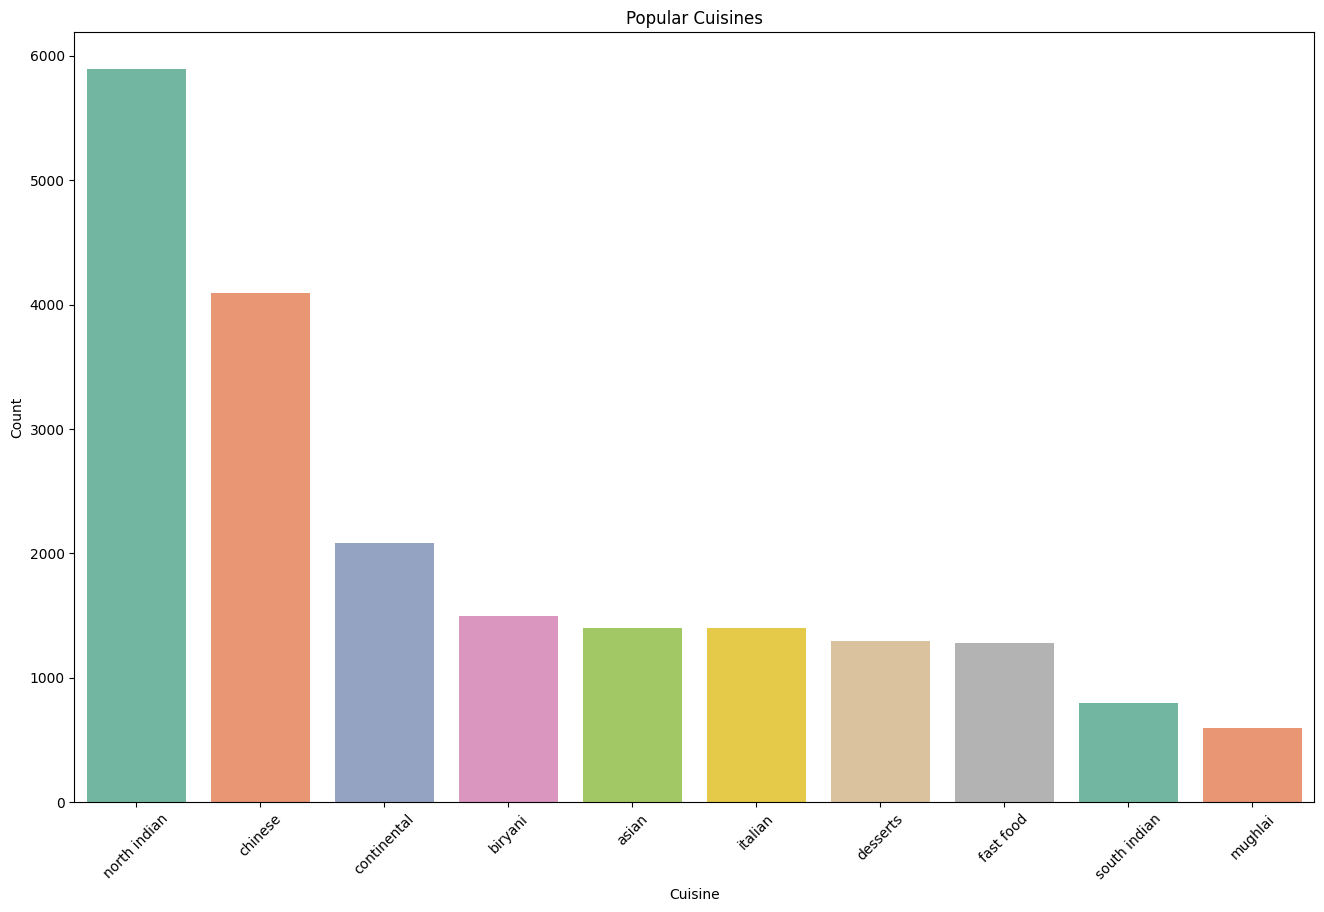

In [41]:
#plot bar chart for cuisines
plt.figure(figsize=(16,10))
sns.barplot(count_cuisines[:10], palette = 'Set2')
#define labels and title
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.title('Popular Cuisines')
plt.xticks(rotation =45)
plt.show()

##### 1. Why did you pick the specific chart?

To find popular cuisine,bar chart will be most appropriate.

##### 2. What is/are the insight(s) found from the chart?

North indian Cuisine is most popular followed by Chinese, continental, biryan and asian.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Identifying the top 10 cuisines can help restaurants understand which types of food are most popular among customers.

Restaurants can choose to specialize in one or more of the top cuisines to build a strong brand identity and attract customers seeking specific types of food.

#### Chart - 6

In [42]:
#explode the Collection Column into separate rows
collection_df = merged_df['Collections'].str.strip().str.split(',', expand =True).stack().reset_index(name='Collections')
#Clean the cuisines by stripping whitespace and converting to lowercase
collection_df['Collections'] = collection_df['Collections'].str.strip().str.lower()
#Count the occurrences of each collection
collection_count = collection_df['Collections'].value_counts()

<ipython-input-43-dca75e18d186>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(collection_count[1:11], palette = 'Set1')


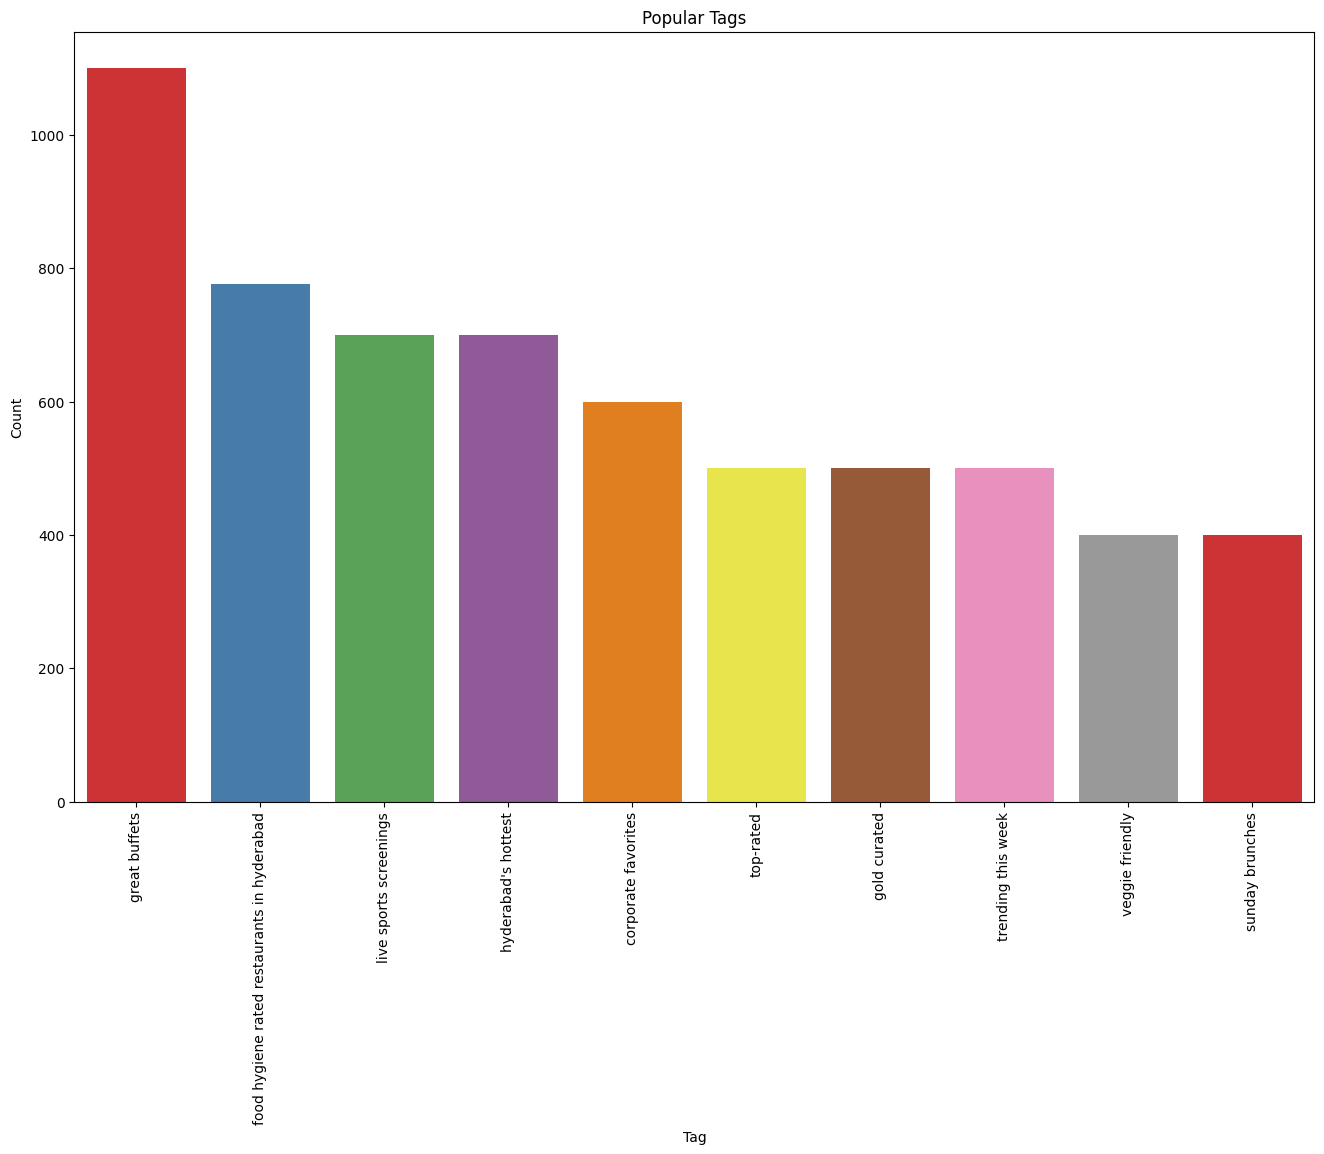

In [43]:
#plot bar chart for collections
plt.figure(figsize=(16,10))
sns.barplot(collection_count[1:11], palette = 'Set1')
#define labels and title
plt.xlabel('Tag')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.title('Popular Tags')
plt.show()

##### 1. Why did you pick the specific chart?

Collections column represent Tagging of Restaurants w.r.t Zomato categories, by ploting collection we can identify popular tags or categories of restaurants.

##### 2. What is/are the insight(s) found from the chart?

The great buffets is most popular tag, buffets appeal to those seeking variety and value for money.

 The tag "food hygiene rated restaurants in Hyderabad" shows that a significant number of customers prioritize food safety and hygiene, which is crucial for building trust and attracting health-conscious diners.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. "great buffets" being a popular tag, restaurants can enhance their buffet offerings by including a variety of high-quality dishes, ensuring a good mix of options to cater to diverse tastes.

Establishments can invest in audio-visual equipment and comfortable seating to enhance the live sports viewing experience, making their venue a preferred spot for sports enthusiasts.

The popularity of the "corporate favorites" tag suggests that many restaurants are catering to business clients.

#### Chart - 7

In [44]:
# Chart - 7 visualization code
# Drop the redundant 'level_1' column
cuisine_df = cuisine_df.drop(columns=['level_1'])
#merge cuisine df with og datafram for cost analysis
cuisine_df = cuisine_df.merge(merged_df[['Cost','Rating']],left_on='level_0', right_index=True)

In [45]:
#groupby cuisine and calculate avg cost
cuisine_cost = cuisine_df.groupby('Cuisines')['Cost'].mean().reset_index()
# Sort by average cost in descending order
cuisine_cost = cuisine_cost.sort_values(by='Cost', ascending=False)

In [46]:
#groupby cuisine and calculate avg rating
cuisine_rating = cuisine_df.groupby('Cuisines')['Rating'].mean().reset_index()
# Sort by average cost in descending order
cuisine_rating = cuisine_rating.sort_values(by='Rating', ascending=False)

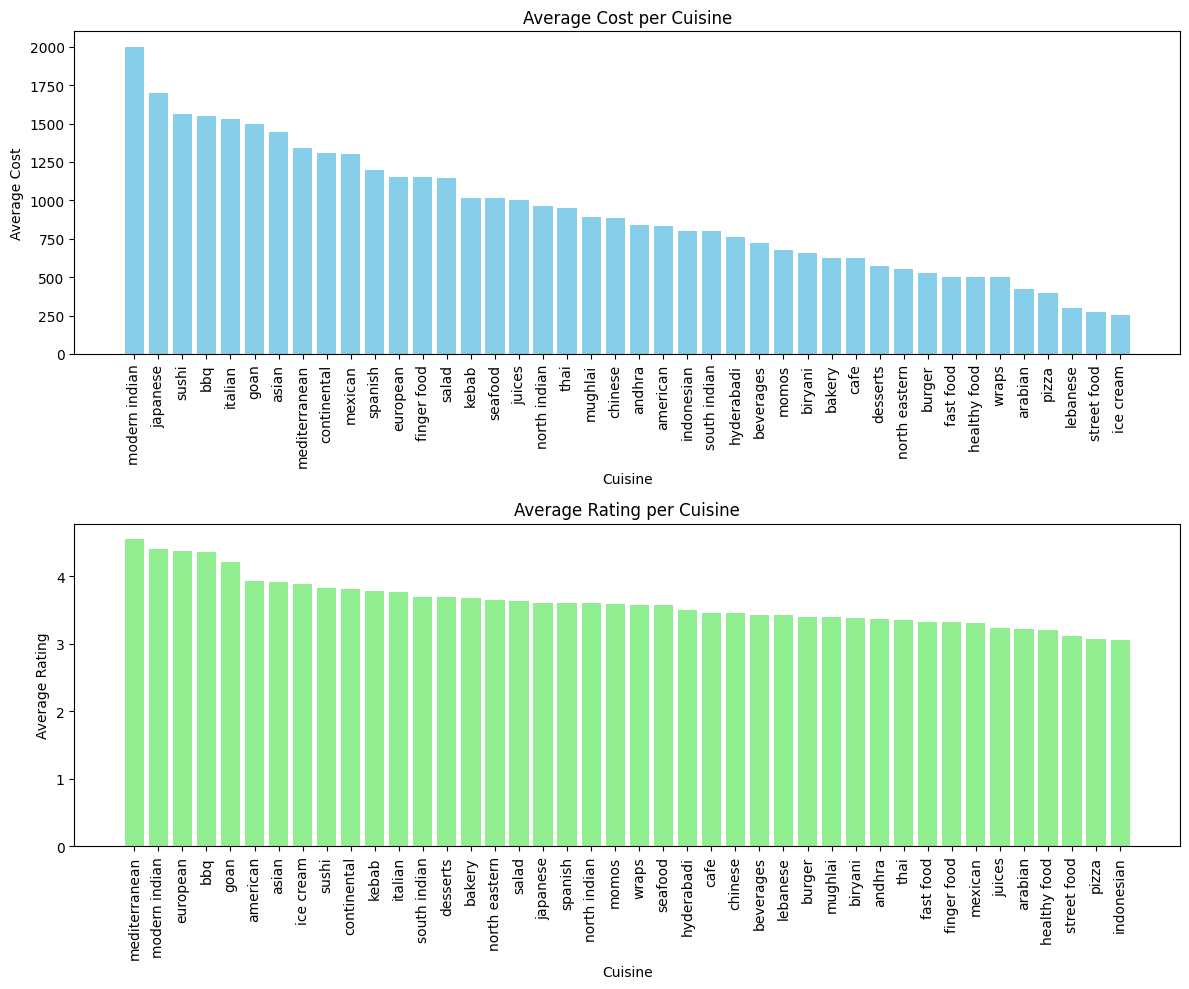

In [47]:
# Plotting the subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plotting average cost per cuisine
ax1.bar(cuisine_cost['Cuisines'], cuisine_cost['Cost'], color='skyblue')
ax1.set_title('Average Cost per Cuisine')
ax1.set_xlabel('Cuisine')
ax1.set_ylabel('Average Cost')
ax1.tick_params(axis='x', rotation=90)

# Plotting average rating per cuisine
ax2.bar(cuisine_rating['Cuisines'], cuisine_rating['Rating'], color='lightgreen')
ax2.set_title('Average Rating per Cuisine')
ax2.set_xlabel('Cuisine')
ax2.set_ylabel('Average Rating')
ax2.tick_params(axis='x', rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

Here i choose subplots of bar chart to compare cuisines with their avg rating and avg costs.

##### 2. What is/are the insight(s) found from the chart?

plot 1 - avg cost per cuisine
Modern Indian cuisine has highest avg cost followed by japanese, sushi, bbq and italian.

Plot 2 - avg rating per cuisine
Meditarranean food has highest avg rating followed by modern indian, european, bbq and goan.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Modern Indian cuisine not only has a high average cost but also a high average rating. This suggests that customers perceive the quality and experience of Modern Indian food to be commensurate with its price. The justification for the high price is indeed supported by its high rating.

Knowing that Mediterranean and Modern Indian cuisines have high ratings, businesses can consider introducing or expanding these offerings to attract more customers. High ratings suggest a strong customer preference and satisfaction, which can lead to repeat business and positive word-of-mouth.


#### Chart - 8

In [48]:
# Drop the redundant 'level_1' column
collection_df = collection_df.drop(columns=['level_1'])
#merge cuisine df with og datafram for cost analysis
collection_df = collection_df.merge(merged_df[['Cost','Rating']],left_on='level_0', right_index=True)

In [49]:
#groupby collection and calculate avg cost
collection_cost = collection_df.groupby('Collections')['Cost'].mean().reset_index()
# Sort by average cost in descending order
collection_cost = collection_df.sort_values(by='Cost', ascending=False)

In [50]:
#groupby collection and calculate avg rating
collection_rating = collection_df.groupby('Collections')['Rating'].mean().reset_index()
# Sort by average rating in descending order
collection_rating = collection_rating.sort_values(by='Rating', ascending=False)

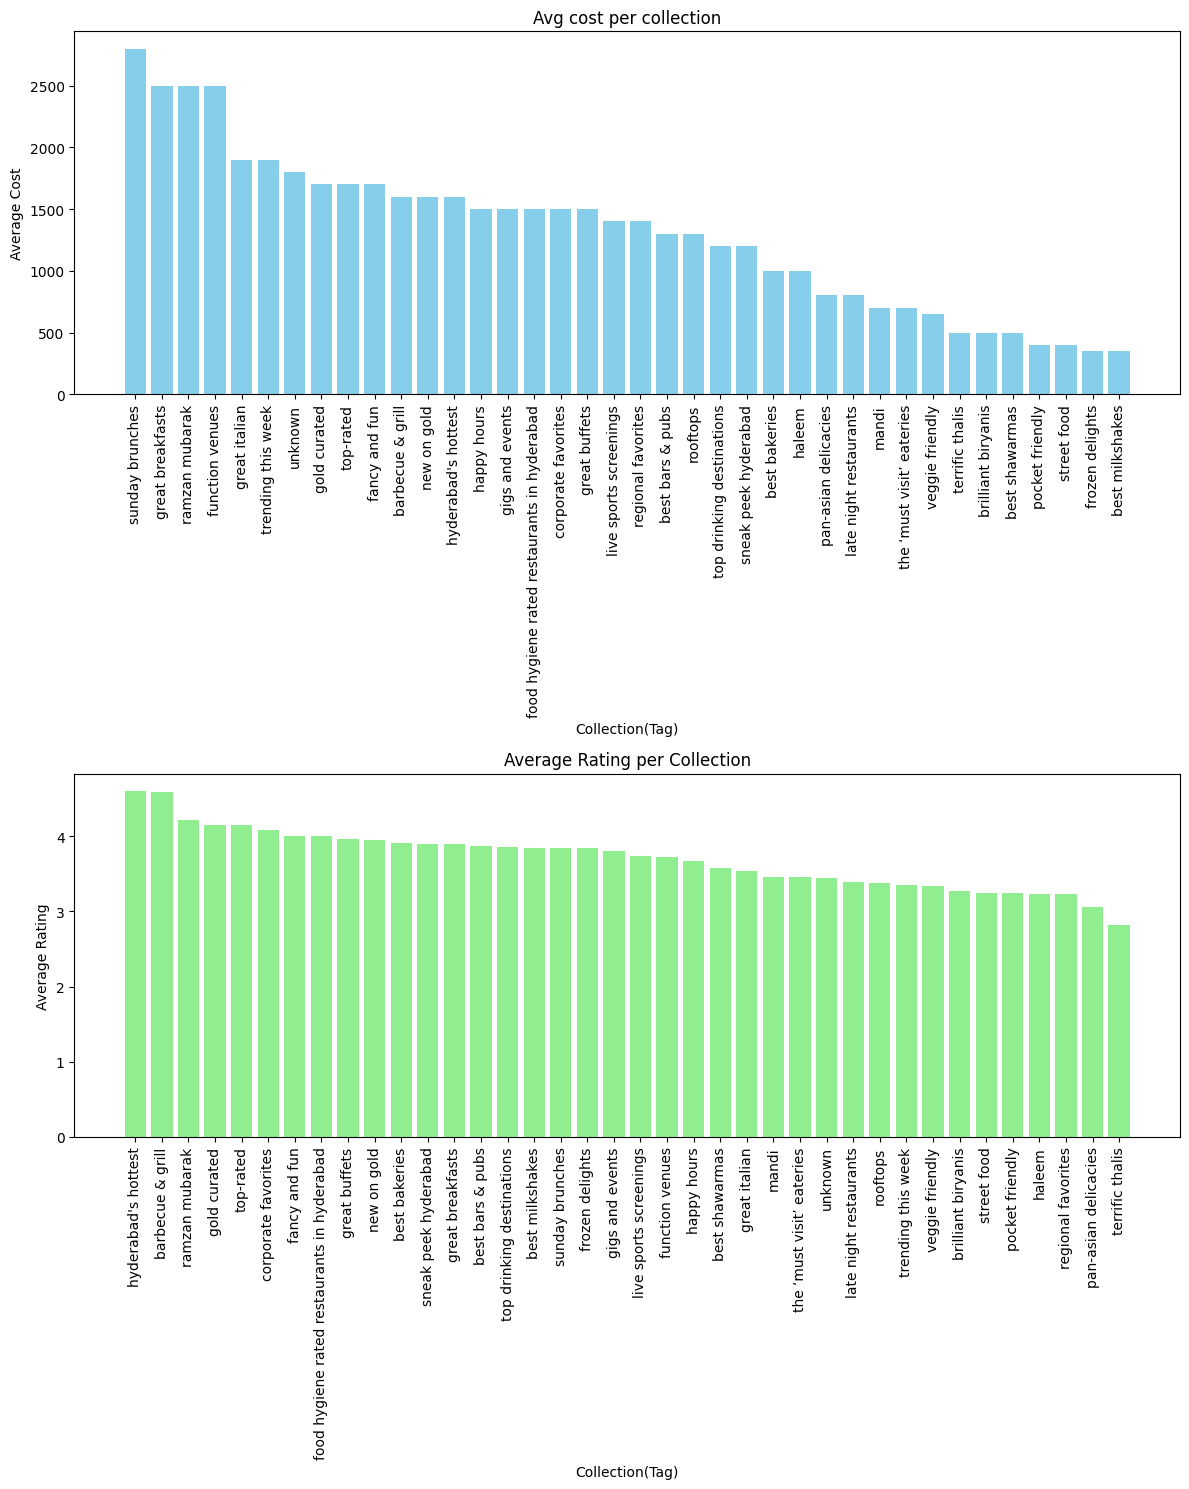

In [51]:
# Plotting the subplots
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(12,15))

# Plotting average cost per cuisine
ax1.bar(collection_cost['Collections'], collection_cost['Cost'],color='skyblue')
ax1.set_title('Avg cost per collection')
ax1.set_xlabel('Collection(Tag)')
ax1.set_ylabel('Average Cost')
ax1.tick_params(axis='x', rotation=90)

# Plotting average rating per cuisine
ax2.bar(collection_rating['Collections'], collection_rating['Rating'], color='lightgreen')
ax2.set_title('Average Rating per Collection')
ax2.set_xlabel('Collection(Tag)')
ax2.set_ylabel('Average Rating')
ax2.tick_params(axis='x', rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Here i choose subplots of bar chart to compare collections or tags or categories with their avg rating and avg cost

##### 2. What is/are the insight(s) found from the chart?

 plot 1 Avg cost per collection

 The Catgeory Sunday brunches has highest avg cost followed by great breakfasts, ramzan mubarak, function venues, great italian.

 Plot 2 Avg rating per restaurant

 The Category Hydebad's hottest has received highest avg rating followed by barbecue & grill, ramzan mubarak, gold curated, top rated.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Ramzan Mubarak and Function venues command higher average costs, indicating that customers may expect special and customized experiences for events or festive occasions.

Understanding which collections command higher average ratings allows restaurants to focus on delivering exceptional experiences in those categories.

Low-rated collections highlight specific areas where restaurants can enhance their offerings, service, or overall experience.

#### Chart - 9

In [52]:
#count the days with most reviews
count_by_day = merged_df['day'].value_counts().reset_index()

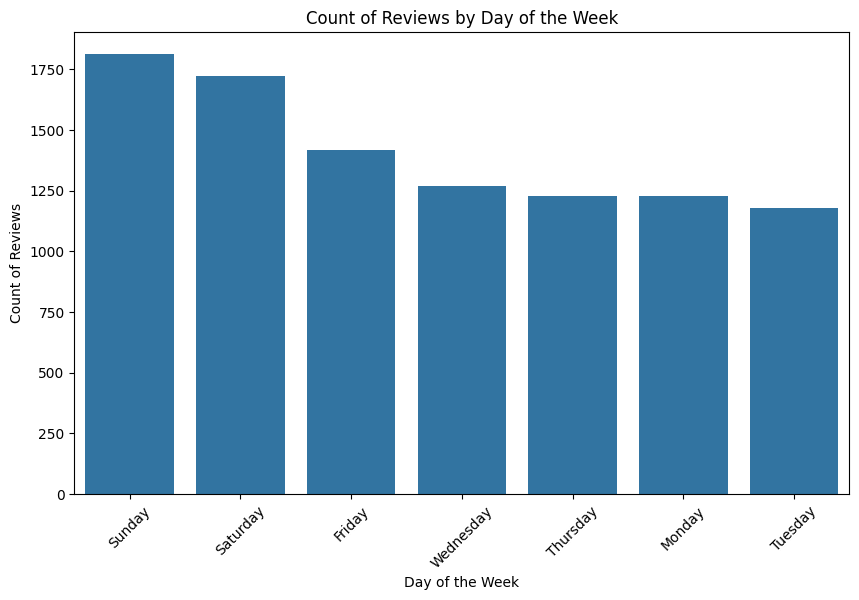

In [53]:
# Chart - 9 visualization code
#plot bar chart
plt.figure(figsize=(10,6))
sns.barplot(x='day', y='count', data = count_by_day)
plt.title('Count of Reviews by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count of Reviews')
plt.xticks(rotation = 45)
plt.show()

##### 1. Why did you pick the specific chart?

To get temporal insights we will create a graph that shows the relationship between the day of the week and the number of reviews received on that day. Typically, people tend to leave reviews for food orders on the same day or immediately after consuming the food. Therefore, we can assume that the number of reviews correlates with the number of orders on a particular day.

##### 2. What is/are the insight(s) found from the chart?

It is evident that the number of orders is highest on weekends, Sunday at top followed by Saturday, and Friday.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Understanding that the number of orders is highest on weekends allows restaurants to optimize their staffing schedules.This trend suggests that customers are more likely to place orders during the weekend, possibly due to more leisure time, social gatherings, and special meals.

 Restaurants can leverage this insight to design targeted promotions and marketing campaigns for weekends. Special deals, discounts, or promotional events on Friday, Saturday, and Sunday can attract more customers and increase sales.

#### Chart - 10

In [54]:
#count the month with most reviews
count_by_month = merged_df['month'].value_counts().reset_index()

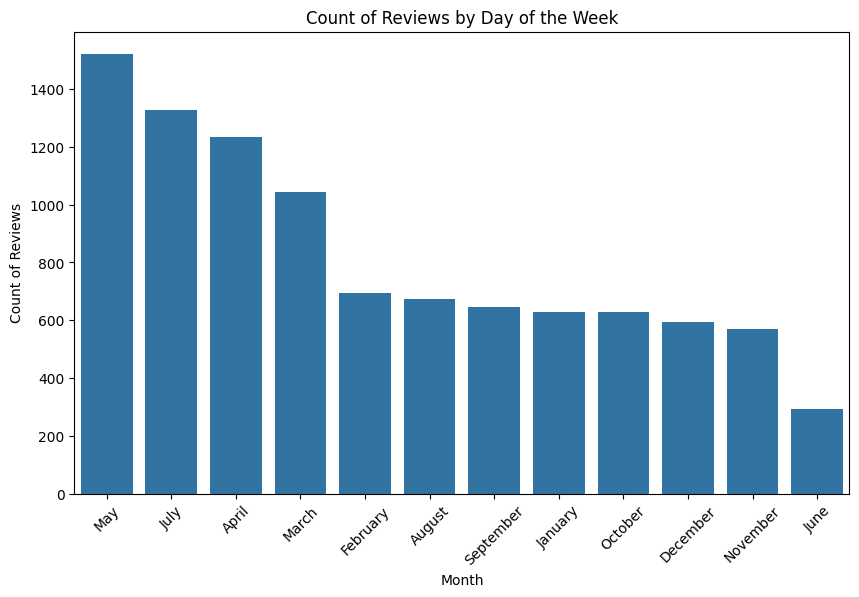

In [55]:
#plot bar chart
plt.figure(figsize=(10,6))
sns.barplot(x='month', y='count', data = count_by_month)
plt.title('Count of Reviews by Day of the Week')
plt.xlabel('Month')
plt.ylabel('Count of Reviews')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

graph that shows the relationship between the month and the number of reviews received in that month, so we can analyse monthly trend.

##### 2. What is/are the insight(s) found from the chart?

May month has received highest number of orders followed by july, april, march and February.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding that May, along with other specific months, sees higher order volumes allows restaurants to plan and execute targeted marketing campaigns during these peak periods. Special promotions, discounts, and events can be scheduled to maximize sales during these times.

Offer special promotions or discounts during months with lower order volumes. This could include deals like "Buy One Get One Free," "Happy Hours," or discounts on specific days of the week.


#### Chart - 11

In [56]:
# Chart - 11 visualization code
count_by_year = merged_df['year'].value_counts().reset_index()

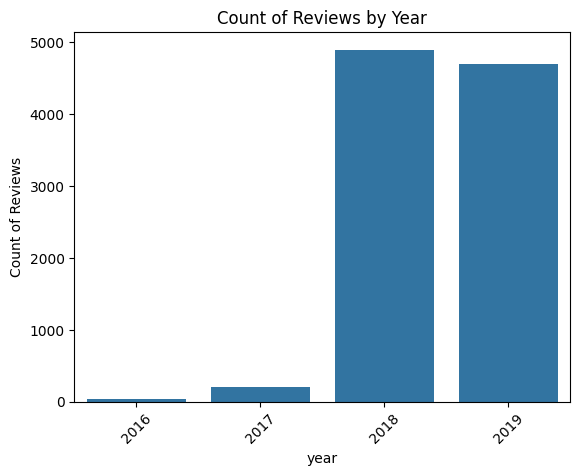

In [57]:
#plot bar chart
sns.barplot(x='year', y='count', data = count_by_year)
plt.title('Count of Reviews by Year')
plt.xlabel('year')
plt.ylabel('Count of Reviews')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

To see order counts or activity of food order changes over year so we plot bar chart of year and its count

##### 2. What is/are the insight(s) found from the chart?

 the data shows a significant increase in the number of orders in 2018 compared to the previous years,

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. The slight drop from 2018 to 2019 might indicate the start of a declining trend, which needs to be addressed promptly to prevent further losses

#### Chart - 12

In [58]:
# Chart - 12 visualization code
#count hourly reviews to find peak hours
count_by_hours = merged_df['hour'].value_counts().reset_index()

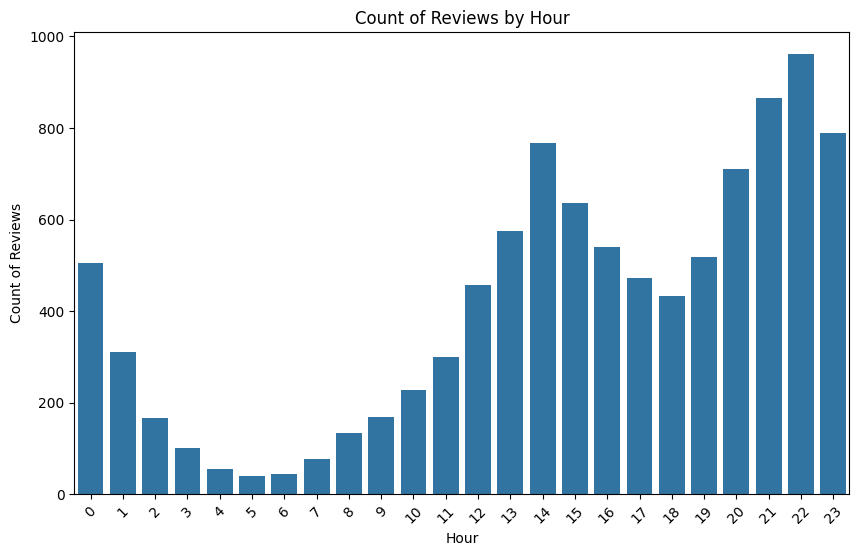

In [59]:
#plot bar chart
plt.figure(figsize=(10,6))
sns.barplot(x='hour', y='count', data = count_by_hours)
plt.title('Count of Reviews by Hour')
plt.xlabel('Hour')
plt.ylabel('Count of Reviews')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

 create a graph that shows the relationship between hour and the number of reviews received. We can find peak ordering time.

##### 2. What is/are the insight(s) found from the chart?

The highest number of orders were placed on 22 (10 pm) followed by 21(9pm), 23(11pm), 14(2pm) and 20(8pm) respectively.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

strong trend towards evening and late-night orders, with a secondary peak around lunch time these are peak ordering time.

Knowing that peak orders occur during the evening and late-night hours allows for better staffing schedules. Introducing special evening and late-night menu items can cater to the preferences of customers ordering during these times. Offering quick and easy-to-prepare items can help manage the kitchen workload more effectively.

#### Chart - 13 - Correlation Heatmap

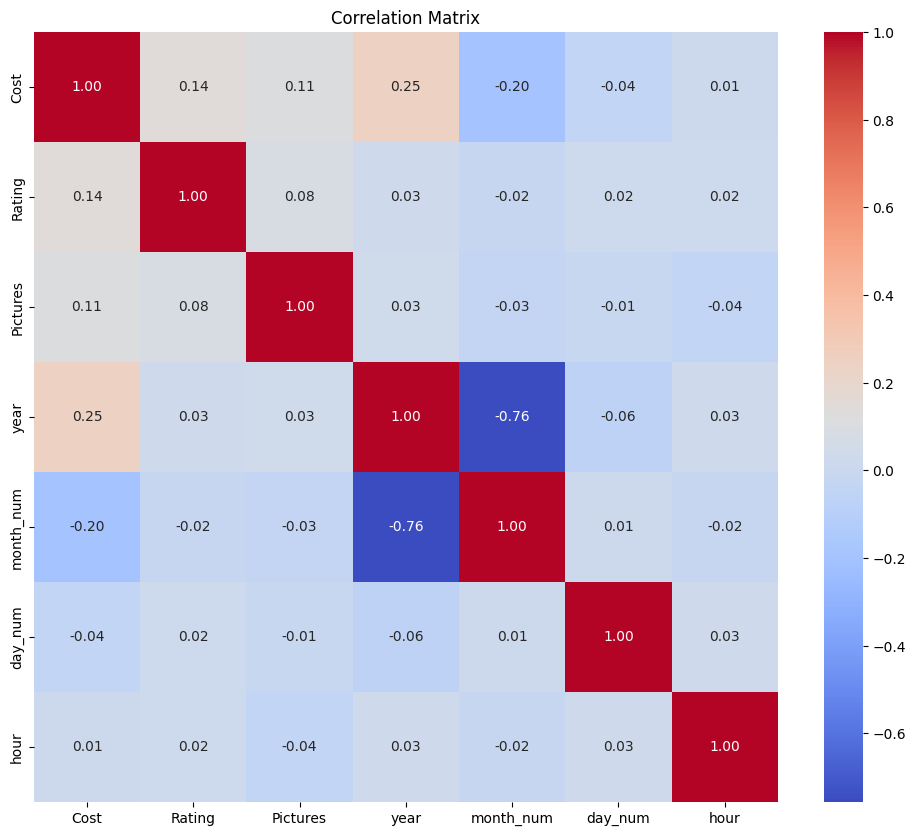

In [60]:
# Correlation Heatmap visualization code
# Filter the DataFrame to include only numeric columns
numeric_df = merged_df[['Cost','Rating','Pictures','year','month_num','day_num','hour']]

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

##### 1. Why did you pick the specific chart?

Heatmaps provide a clear and concise visual representation of correlations, allowing for quick interpretation of the strength and direction of relationships between variables.

##### 2. What is/are the insight(s) found from the chart?

The heatmap may also show a small positive correlation between the cost of dining and the rating of restaurants.
Absence of a strong correlation between the number of pictures posted with reviews and the rating of restaurants.

#### Chart - 14 - Pair Plot

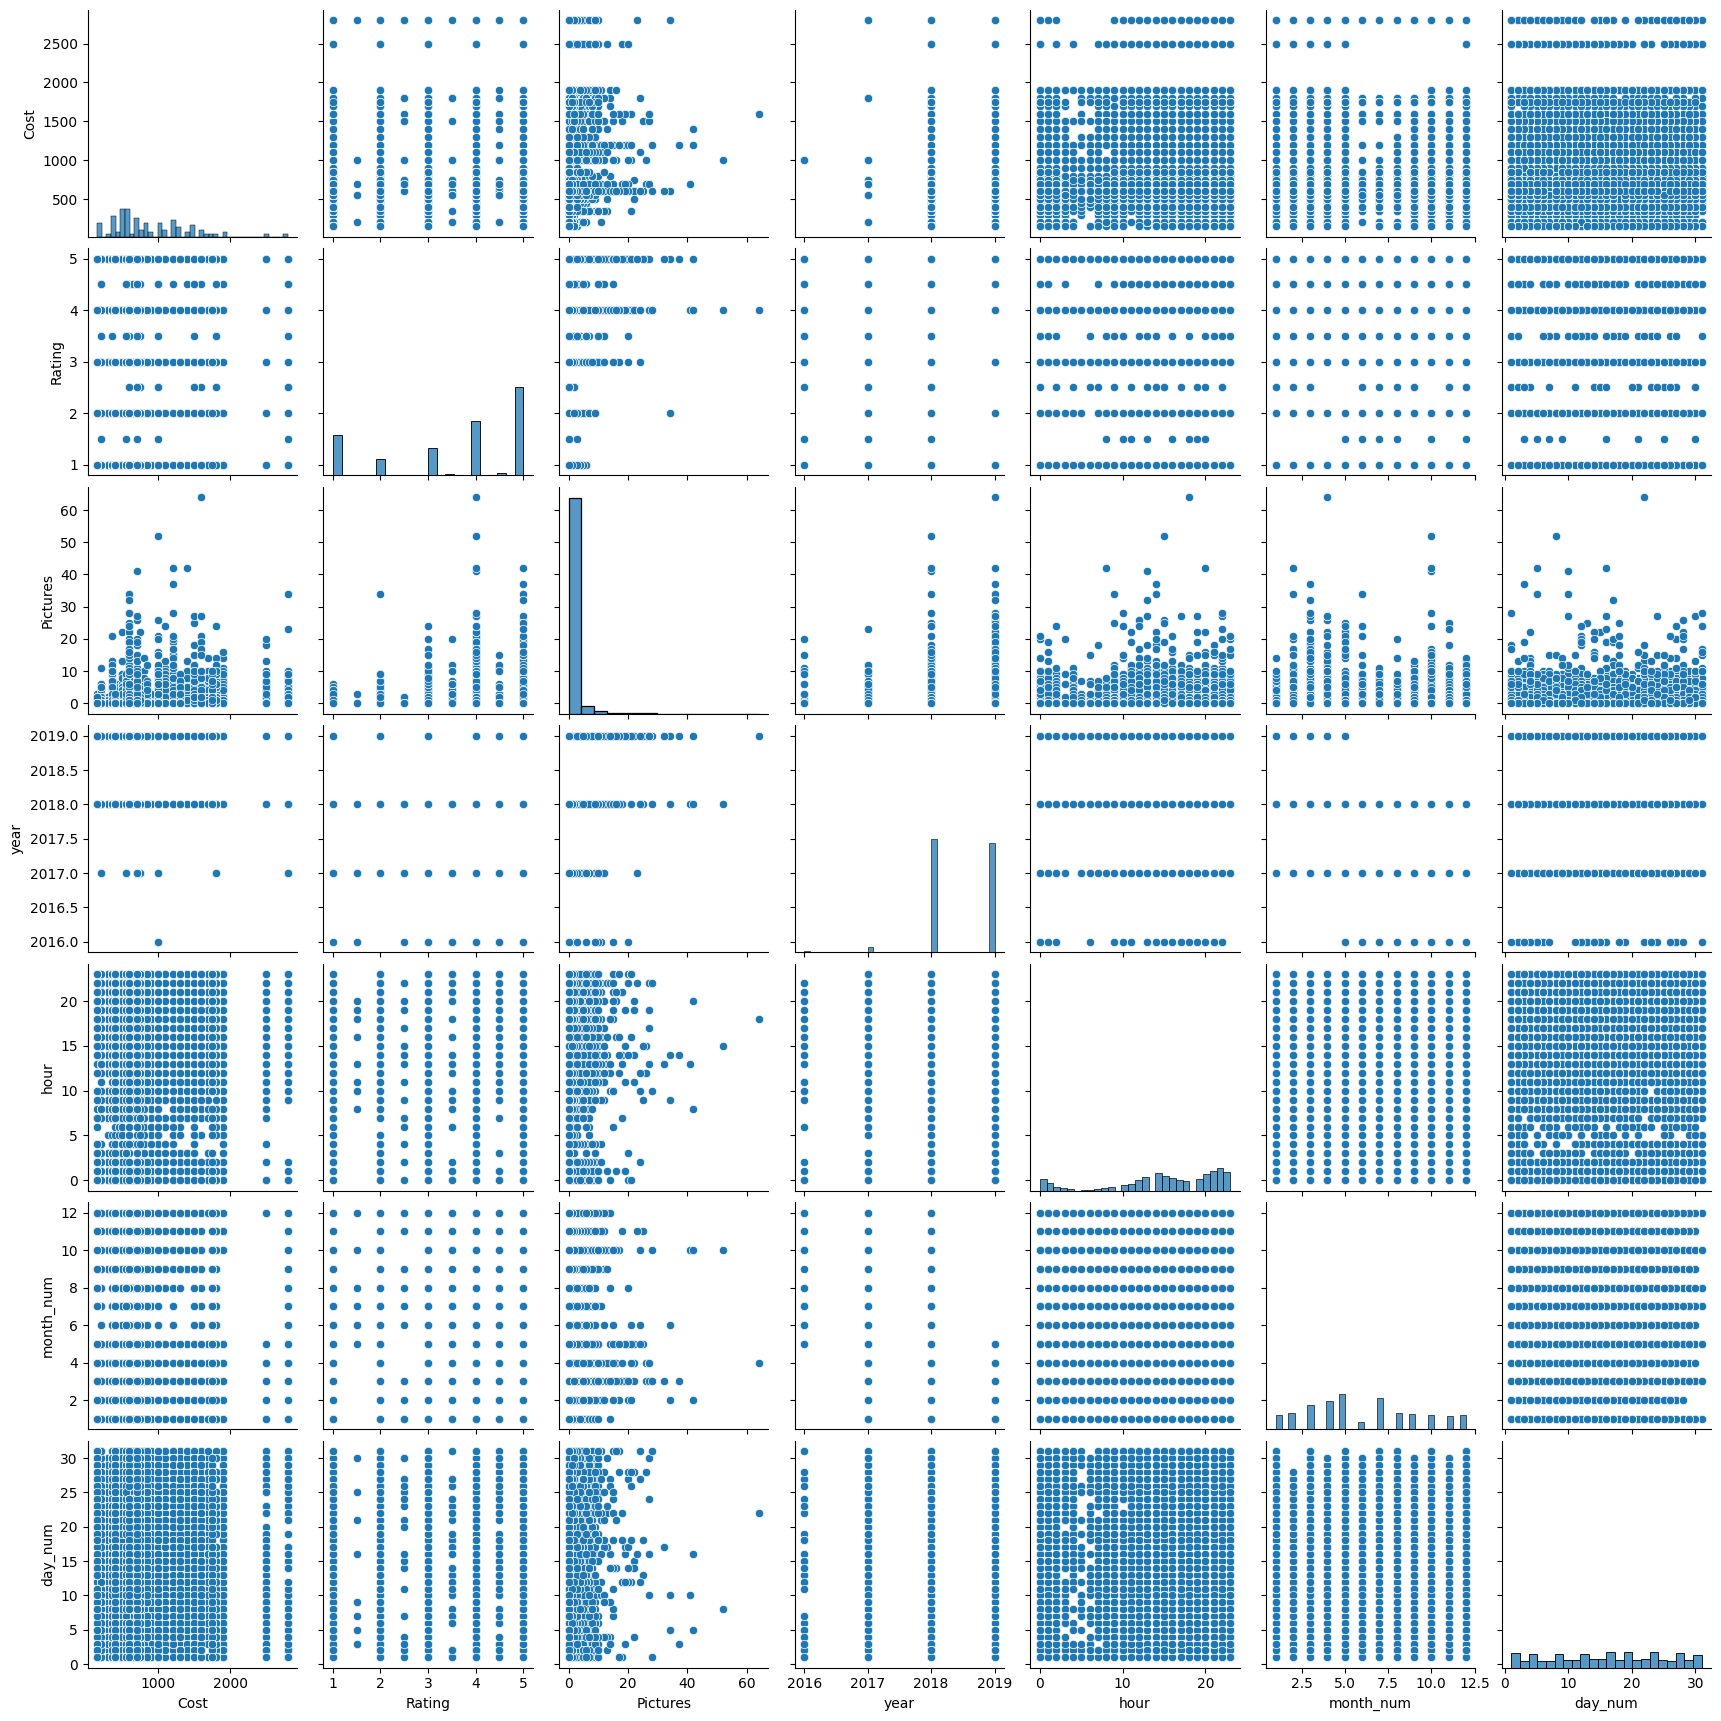

In [61]:
# Pair Plot visualization code
sns.pairplot(merged_df)
plt.show()

##### 1. Why did you pick the specific chart?

Pair plots are great for visualizing pairwise relationships between multiple variables in a dataset.

##### 2. What is/are the insight(s) found from the chart?

The pairplot allow us to observe relationships, trends, and potential correlations between variables by examining scatterplots and histograms. Patterns like linear relationships, clusters, or distributions can be inferred from the chart.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypthesis number 1 -

**Null Hypothesis:** The mean estimated cost per person is equal to 1000

**Alternative Hypothesis:** The mean estimated cost per person is not equal to 1000

Hypothesis number 2 -

**Null Hypothesis:** There is no significant difference in the average cost among different cuisines.

**Alternative Hypothesis:** There is a significant difference in the average cost among different cuisines

Hypothesis number 3 -

**Null Hypothesis:** There is no significant difference in the mean number of orders between weekends and weekdays.

**Alternative Hypothesis:** There is a significant difference in the mean number of orders between weekends and weekdays

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis:** The mean estimated cost per person is equal to 1000

**Alternative Hypothesis:** The mean estimated cost per person is not equal to 1000

#### 2. Perform an appropriate statistical test.

In [62]:
# Perform Statistical Test to obtain P-Value
from scipy import stats
# Calculate sample statistics
sample_mean = np.mean(merged_df['Cost'])
sample_std = np.std(merged_df['Cost'], ddof=1)  # ddof=1 for sample standard deviation
sample_size = len(merged_df['Cost'])

#Hypothesized population mean
mu_0 = 1000

# Calculate the t-statistic
t_statistic = (sample_mean - mu_0) / (sample_std / np.sqrt(sample_size))

# Calculate the degrees of freedom
degrees_of_freedom = sample_size - 1

# Calculate the p-value
p_value = stats.t.sf(np.abs(t_statistic), df=degrees_of_freedom) * 2 #two sided test

# Output results
print(f"Sample Mean: {sample_mean}")
print(f"Sample Standard Deviation: {sample_std}")
print(f"Sample Size: {sample_size}")
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Determine whether to reject the null hypothesis
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The mean estimated cost per person is significantly different from 1000.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference from 1000.")

Sample Mean: 871.544550436371
Sample Standard Deviation: 506.0319292309863
Sample Size: 9854
T-Statistic: -25.198859894891726
P-Value: 7.756030842769013e-136
Reject the null hypothesis. The mean estimated cost per person is significantly different from 1000.


##### Which statistical test have you done to obtain P-Value?

The statistical test we have used to obtain the P-value is the t-test.

##### Why did you choose the specific statistical test?

The t-test accounts for the variability in the sample data by using the sample standard deviation, making it suitable when the population standard deviation is not known.
This measures how far the sample mean is from the hypothesized population mean in units of the standard error.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** There is no significant difference in the average cost among different cuisines.

**Alternative Hypothesis (H1):** There is a significant difference in the average cost among different cuisines.

#### 2. Perform an appropriate statistical test.

In [63]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import f_oneway

# Extracting cost data for each cuisine
cuisine_groups = []
for cuisine in cuisine_df['Cuisines'].unique():
    cuisine_groups.append(cuisine_df[cuisine_df['Cuisines'] == cuisine]['Cost'])

# Performing ANOVA test
f_statistic, p_value = f_oneway(*cuisine_groups) #asterisk (*) is used to unpack the list of arrays into individual arguments.

# Setting significance level (alpha)
alpha = 0.05

# Printing results
print("ANOVA Results:")
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Comparing p-value with alpha
if p_value < alpha:
    print("The p-value is less than alpha. Reject the null hypothesis.")
    print("There is a significant difference in the average cost among cuisine groups.")
else:
    print("The p-value is greater than or equal to alpha. Fail to reject the null hypothesis.")
    print("There is no significant difference in the average cost among cuisine groups.")


ANOVA Results:
F-statistic: 448.72473627823734
P-value: 0.0
The p-value is less than alpha. Reject the null hypothesis.
There is a significant difference in the average cost among cuisine groups.


##### Which statistical test have you done to obtain P-Value?

The statistical test we have used to obtain the P-value is the ANOVA (analysis of variance), f_statistics or f_oneway test is employed.

##### Why did you choose the specific statistical test?

ANOVA is suitable for comparing the means of three or more groups simultaneously. It tests whether there are any statistically significant differences among the means of the groups. ANOVA assumes that the data are normally distributed and that the variances within the groups are approximately equal.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis:** There is no significant difference in the mean number of orders between weekends and weekdays.

**Alternative Hypothesis:** There is a significant difference in the mean number of orders between weekends and weekdays

#### 2. Perform an appropriate statistical test.

In [64]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Splitting data into weekends and weekdays
weekends = count_by_day[(count_by_day['day'] == 'Saturday') | (count_by_day['day'] == 'Sunday')]
weekdays = count_by_day[(count_by_day['day'] != 'Saturday') & (count_by_day['day'] != 'Sunday')]

#Performing t-test
t_stat, p_value = stats.ttest_ind(weekends['count'], weekdays['count'], equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

# Reject or accept null hypothesis based on p-value
if p_value < 0.05:
    print("Reject null hypothesis: There is a significant difference in the mean number of orders between weekends and weekdays.")
else:
    print("Accept null hypothesis: There is no significant difference in the mean number of orders between weekends and weekdays.")


T-statistic: 8.147739122772794
P-value: 0.004988603728630881
Reject null hypothesis: There is a significant difference in the mean number of orders between weekends and weekdays.


##### Which statistical test have you done to obtain P-Value?

The statistical test we have used to obtain the P-value is the t-test.

##### Why did you choose the specific statistical test?

I chose the t-test, it's primarily because the t-test assumes that the data are normally distributed. In many cases, such as when dealing with counts of orders, the Central Limit Theorem suggests that the distribution of the sample means tends to be normal even if the underlying data is not normally distributed.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [65]:
# Handling Missing Values & Missing Value Imputation
#We have already addressed the issue of missing values
merged_df.isnull().sum()

Name           0
Links          0
Cost           0
Collections    0
Cuisines       0
Timings        0
Reviewer       0
Review         0
Rating         0
Metadata       0
Time           0
Pictures       0
day            0
month          0
year           0
hour           0
month_num      0
day_num        0
Cost_bin       0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

We have already dealt with missing values.

### 2. Handling Outliers

In [66]:
# Handling Outliers & Outlier treatments
#select numerical columns
num_col = merged_df.select_dtypes(include = ['int64', 'float64','int32'])
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = num_col.quantile(0.25)
Q3 = num_col.quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Determine the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#identify outliers
outliers_iqr = ((num_col < lower_bound) | (num_col > upper_bound)).any(axis=1)
print('Potential outliers using IQR method', outliers_iqr.sum())

Potential outliers using IQR method 2145


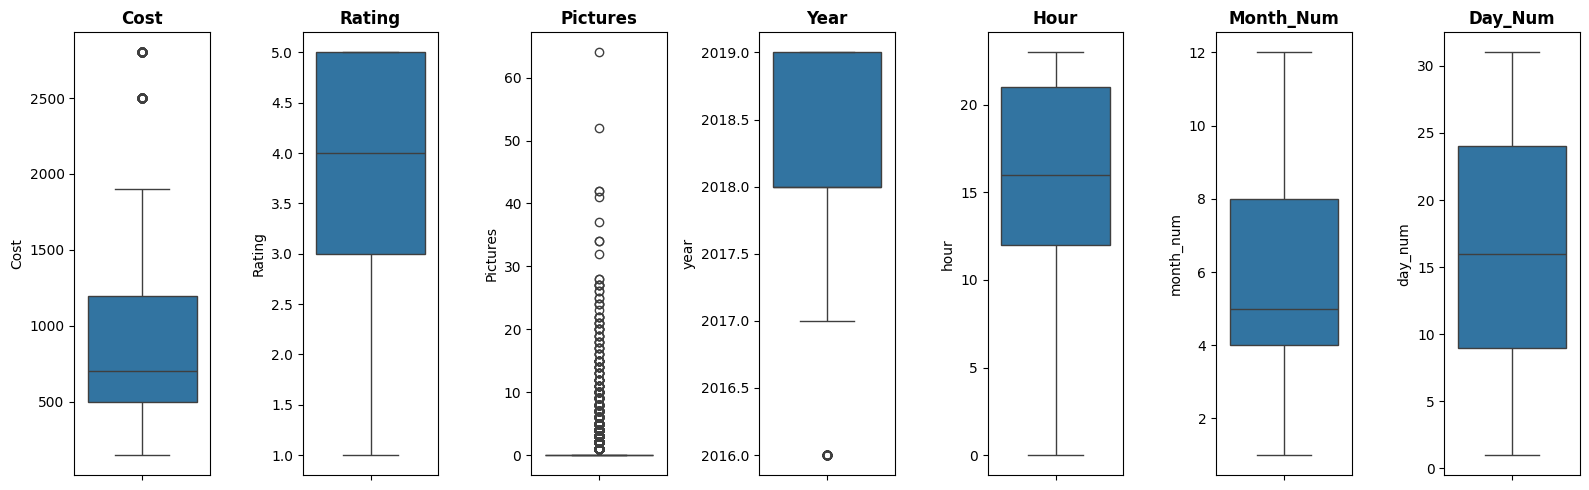

In [67]:
# checking outliers with the help of box plot for numerical columns
plt.figure(figsize=(16,5))
for i, j in enumerate(num_col):
  plt.subplot(1, 7, i +1)
  sns.boxplot(merged_df[j])
  plt.title(f'{j.title()}',weight='bold')
  plt.tight_layout()

##### What all outlier treatment techniques have you used and why did you use those techniques?

We can see that almost all outliers are from pictures columns they are valid data points we will keep them as not all customers make efforts to post pictures with reviews.

### 3. Dividing Data for further Analysis.

We have 2 objetives- clustering and sentiment analysis so i decided to separate data for clustering and sentiment analysis.

In [159]:
#create copy of dataframe
df = merged_df.copy()

In [160]:
#selecting columns for clustering
clustering_data = df[['Cost', 'Rating']]

In [161]:
clustering_data.shape

(9854, 2)

#### What all categorical encoding techniques have you used & why did you use those techniques?

For clustering task we have used Label Encoding on Cuisines column.

Label Encoding assigns a unique numerical label to each category.

### 4. Data Scaling

In [162]:
# Scaling your data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = clustering_data[['Cost', 'Rating']]
scaled_numerical = scaler.fit_transform(numerical_features)

##### Which method have you used to scale you data and why?

For data scaling i have used StandardScaler technique. Its purpose is to standardize features within a dataset by removing the mean and scaling them to a unit variance. This essentially makes all features have the same scale, which can be beneficial for model implementation.

### 5. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [75]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 15.9 MB/s eta 0:00:00


In [76]:
import contractions
# Function to expand contractions in review text
def expand_contractions(review):
    return contractions.fix(review)

# Apply contraction expansion to the 'Review' column
merged_df['Review'] = merged_df['Review'].apply(expand_contractions)

#### 2. Lower Casing

In [77]:
# Lower Casing
merged_df['Review'] = merged_df['Review'].str.lower()

# Checking the manipulation
merged_df.iloc[100,]['Review']

'paradise biryani is really good service also good staff friendly ambiance nice i had chicken biryani and mutton biryani both are good thank you'

#### 3. Removing Punctuations

In [78]:
# Remove Punctuations
import string
def remove_punctuations(text):
  """
  Remove punctuations from the given text.

  Parameters:
  text (str): The input text containing punctuations.

  Returns:
  str: The text with punctuations removed.
  """
  # Define a translation table that maps each punctuation character to None
  translator = str.maketrans('','',string.punctuation)

  # Use translate() method to remove punctuations from the text
  text_without_punctuation = text.translate(translator)

  return text_without_punctuation

In [79]:
#apply function to review column
merged_df['Review'] = merged_df['Review'].apply(remove_punctuations)
# Checking the manipulation
merged_df.iloc[100,]['Review']

'paradise biryani is really good service also good staff friendly ambiance nice i had chicken biryani and mutton biryani both are good thank you'

#### 4. Removing URLs & Removing words and digits contain digits.

In [80]:
# Remove URLs & Remove words and digits contain digits
def remove_url_and_numbers(text):
    '''This function is used to remove the URL's and Numbers from the given sentence'''
    # Importing needed libraries
    import re

    # Replacing the URLs with no space
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    text = re.sub(url_pattern, '', text)

    # Replacing the digits with one space
    text = re.sub(r'\b\d+\b', '', text)

    # Return the text stripped off URLs and Numbers
    return text

In [81]:
#apply function to review column
merged_df['Review'] = merged_df['Review'].apply(remove_url_and_numbers)
# Checking the manipulation
merged_df.iloc[117,]['Review']

'friendly nice service chicken biryani is delicious\ncurry bowl design nice nice temp nice as cooling nice tooth pics nice spot for selfie nice restaurant settings'

#### 5. Removing Stopwords & Removing White spaces

In [82]:
# Remove Stopwords
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords_and_whitespace(text):
  # Tokenize the text
  words = text.split()

  # Remove stopwords and whitespace
  filtered_words = [word for word in words if word.lower() not in stop_words]
  cleaned_text = ' '.join(filtered_words)

  return cleaned_text.strip()  # Remove leading and trailing white spaces


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [83]:
#apply function to review column
merged_df['Review'] = merged_df['Review'].apply(remove_stopwords_and_whitespace)
#check manipulation
merged_df.iloc[183,]['Review']

'briyani good crispy briyani good crispy briyani good crispy briyani good crispy service also good'

#### 6. Rephrase Text

In [84]:
# Rephrase Text
#we will use Stemming/Lemmatization instead

#### 7. Tokenization

In [85]:
# Downloading needed libraries
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Tokenization
merged_df['Review']= merged_df['Review'].apply(word_tokenize)
#check manipulation
merged_df.iloc[183,]['Review']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['briyani',
 'good',
 'crispy',
 'briyani',
 'good',
 'crispy',
 'briyani',
 'good',
 'crispy',
 'briyani',
 'good',
 'crispy',
 'service',
 'also',
 'good']

#### 8. Text Normalization

In [86]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Downloading needed libraries
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
# Creating instance for wordnet
wordnet  = WordNetLemmatizer()

def lemmatizing_sentence(text):
    text = [wordnet.lemmatize(word) for word in text]

    # joining the list of words with space separator
    text=  " ".join(text)

    # return the manipulated string
    return text

# Rephrasing text by applying defined lemmatizing function
merged_df['Review'] = merged_df['Review'].apply(lemmatizing_sentence)

# Checking the observation after manipulation
merged_df.iloc[200,]['Review']

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


'people visited place thursday nightambience service good food disappointednot worth money pay'

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [87]:
# POS Taging
# tokenize the text into words before POS Taging
merged_df['pos_tags'] = merged_df['Review'].apply(nltk.word_tokenize).apply(nltk.pos_tag)

# Checking the observation after manipulation
merged_df.head(5)

,Name,Links,Cost,Collections,Cuisines,Timings,Reviewer,Review,Rating,Metadata,Time,Pictures,day,month,year,hour,month_num,day_num,Cost_bin,pos_tags
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Rusha Chakraborty,ambience good food quite good saturday lunch c...,5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0,Saturday,May,2019,15,5,25,"(700, 800]","[(ambience, RB), (good, JJ), (food, NN), (quit..."
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Anusha Tirumalaneedi,ambience good pleasant evening service prompt ...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0,Saturday,May,2019,14,5,25,"(700, 800]","[(ambience, RB), (good, JJ), (pleasant, NN), (..."
2,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Ashok Shekhawat,must try great food great ambience thnx servic...,5.0,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0,Friday,May,2019,22,5,24,"(700, 800]","[(must, MD), (try, VB), (great, JJ), (food, NN..."
3,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Swapnil Sarkar,soumen da arun great guy behavior sincerety go...,5.0,"1 Review , 1 Follower",2019-05-24 22:11:00,0,Friday,May,2019,22,5,24,"(700, 800]","[(soumen, NNS), (da, VBP), (arun, RB), (great,..."
4,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Dileep,food goodwe ordered kodi drumstick basket mutt...,5.0,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0,Friday,May,2019,21,5,24,"(700, 800]","[(food, NN), (goodwe, NN), (ordered, VBD), (ko..."


#### 10. Text Vectorization

In [88]:
# Vectorizing Text
# Importing needed libraries
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating instance
tfidfv = TfidfVectorizer(max_features=30000)        # Setting max features as 30000 to avoid RAM explosion

# Fitting on TfidfVectorizer
x= tfidfv.fit_transform(merged_df['Review'])

# Check the shape of the TF-IDF matrix
print("Shape of TF-IDF matrix:", x.shape)

Shape of TF-IDF matrix: (9854, 17063)


##### Which text vectorization technique have you used and why?

TF-IDF vectorization is applied to the review texts to convert them into numerical form.

### 6. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Clustering algorithms can become computationally expensive with high-dimensional data. By reducing dimensionality with PCA, you can potentially speed up the clustering process. Shape of TF-IDF matrix: (9854, 17063) we will try to reduce dimensionality.

In [89]:
#Apply PCA with the chosen number of components
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95) #capture 95% of variance.
X_pca = pca.fit_transform(x.toarray())
# Checking the shape of transformed matrix
X_pca.shape

(9854, 4197)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

PCA helps reduce the number of features, which can be beneficial for several clustering algorithms. The new shape is (9854, 4197).

## ***7. ML Model Implementation***

### ML Model - 1 (K-means Clustering restaurant info)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for n_clusters =2, silhouette score is 0.44017963016072664


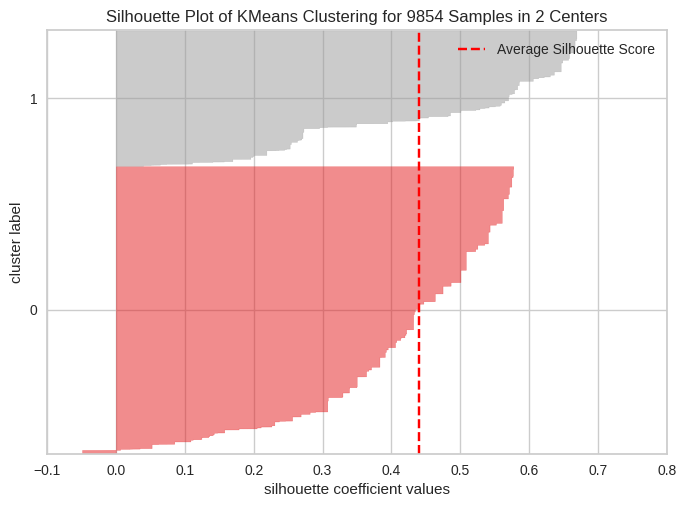

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for n_clusters =3, silhouette score is 0.4975639228439021


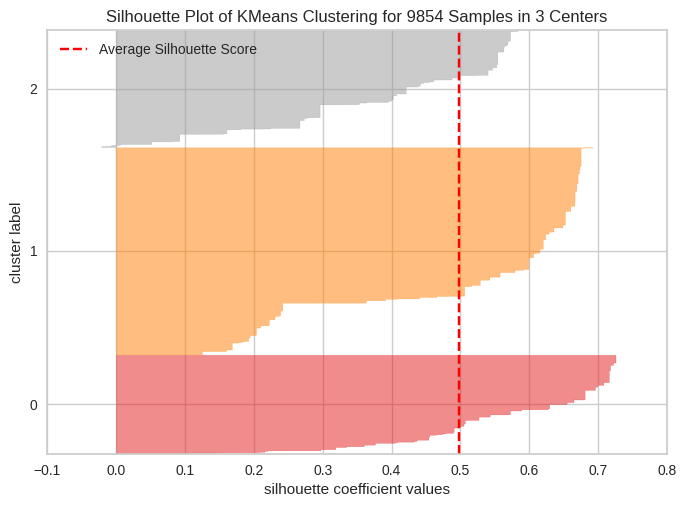

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for n_clusters =4, silhouette score is 0.47693407922539616


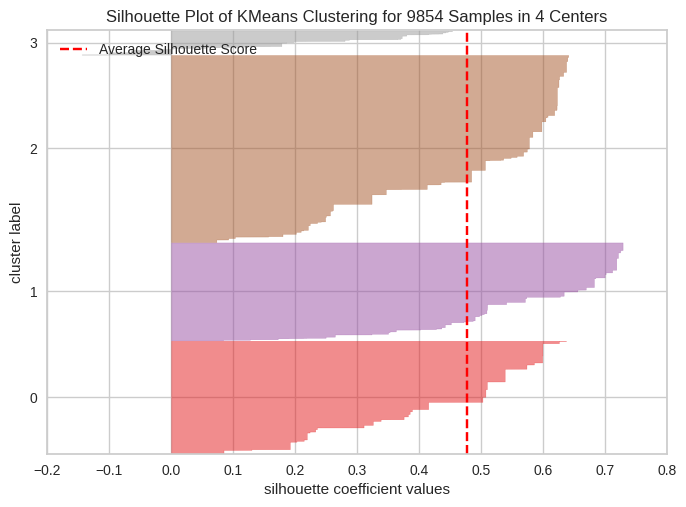

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for n_clusters =5, silhouette score is 0.4965079399401146


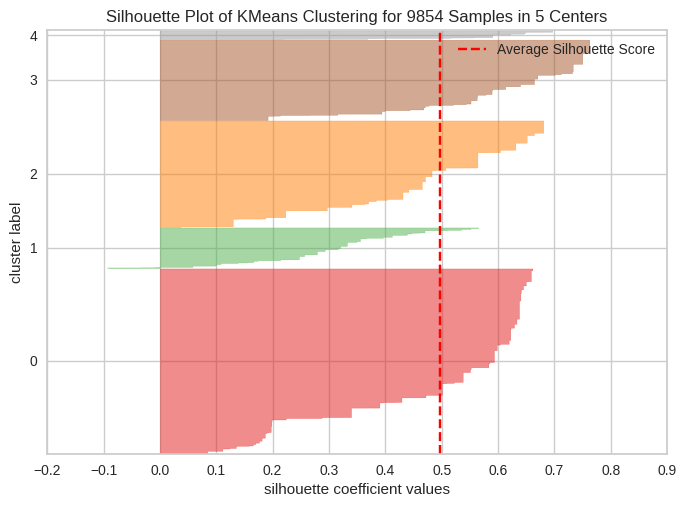

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for n_clusters =6, silhouette score is 0.47584950167059525


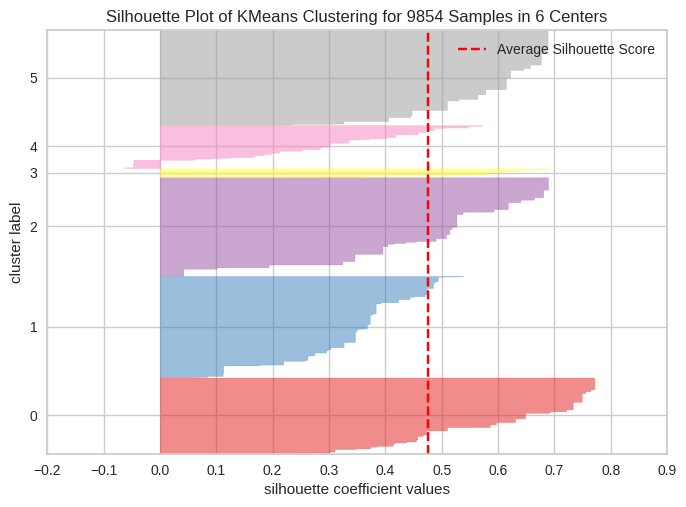

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for n_clusters =7, silhouette score is 0.46395285924341917


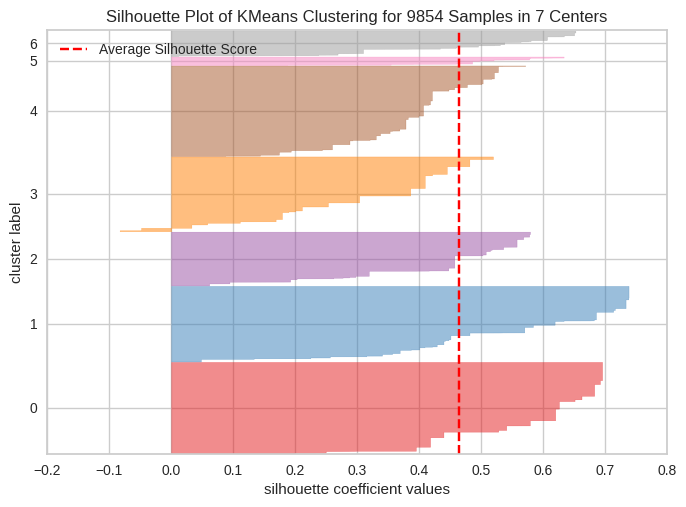

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for n_clusters =8, silhouette score is 0.480782449147391


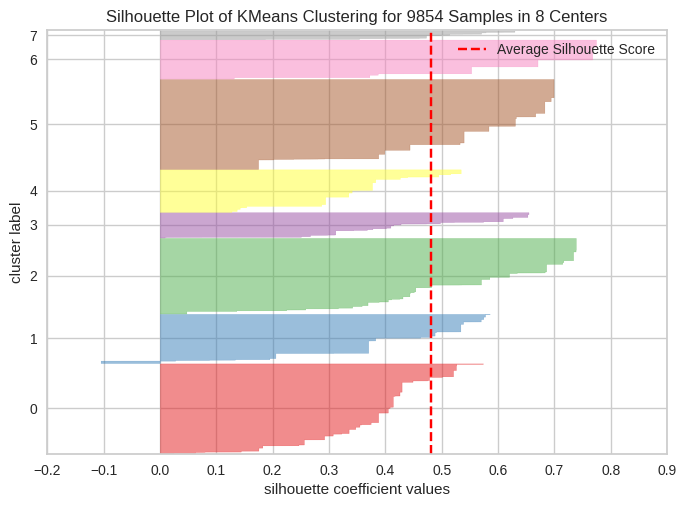

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for n_clusters =9, silhouette score is 0.4668899934576816


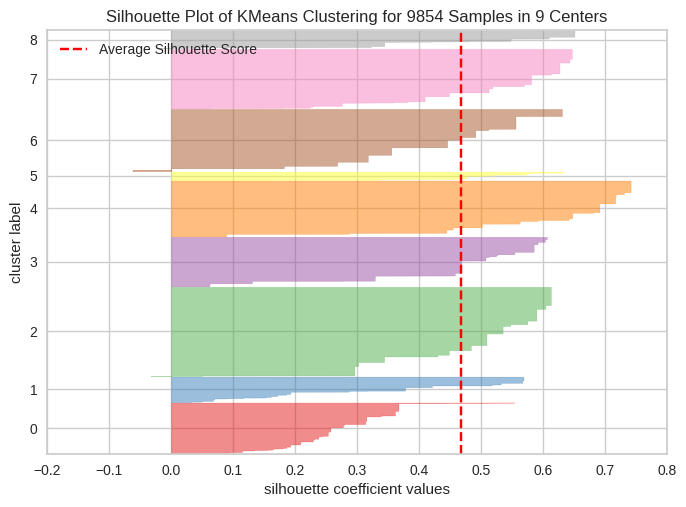

[0.44017963016072664,
 0.4975639228439021,
 0.47693407922539616,
 0.4965079399401146,
 0.47584950167059525,
 0.46395285924341917,
 0.480782449147391,
 0.4668899934576816]

In [163]:
# ML Model - 1 Implementation
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

def silhouette_analysis(n):
  silhouette_scores = [] # List to store silhouette scores
  for n_clusters in range(2,n):
    km = KMeans(n_clusters = n_clusters)
    preds = km.fit_predict(scaled_numerical)
    score = silhouette_score(scaled_numerical, preds, metric = 'euclidean')
    silhouette_scores.append(score) # Append silhouette score to the list
    print('for n_clusters ={}, silhouette score is {}'.format(n_clusters, score))
    visualizer = SilhouetteVisualizer(km)
    visualizer.fit(scaled_numerical)
    visualizer.poof()
  return silhouette_scores  # Return the list of silhouette scores

# Call the silhouette_analysis function with the desired maximum number of clusters
silhouette_analysis(n=10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

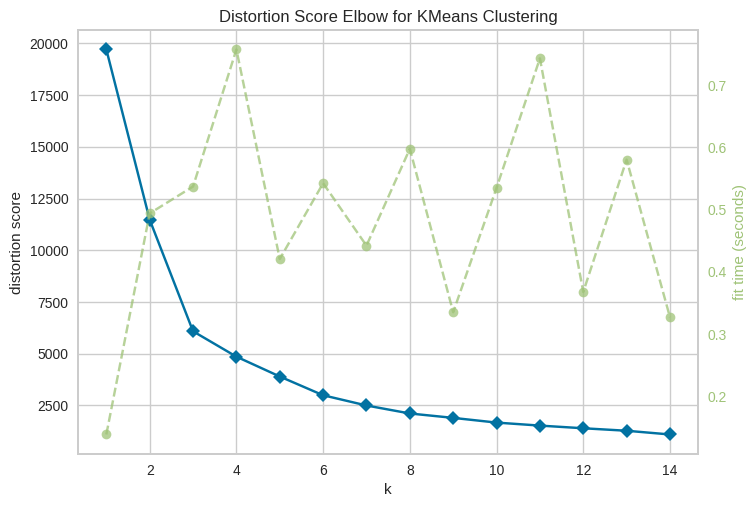

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [164]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(1,15),locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(scaled_numerical)

# Finalize and render the figure
visualizer.show()

In [165]:
#Look for a point where the decrease in inertia slows down significantly.
print("Inertia values for each number of clusters:")
for k, score in zip(visualizer.k_values_, visualizer.k_scores_):
    print(f"k={k}: {score}")

Inertia values for each number of clusters:
k=1: 19708.0
k=2: 11475.445523949435
k=3: 6080.067875057366
k=4: 4853.222604689387
k=5: 3893.479942152158
k=6: 2986.8102968681033
k=7: 2491.866945609352
k=8: 2105.3701318661347
k=9: 1892.6787508178809
k=10: 1665.273286738044
k=11: 1519.5301341686672
k=12: 1390.6256587242278
k=13: 1270.3861560366827
k=14: 1090.41606367723


In [166]:
# Apply k-means with the chosen number of clusters (assuming k=5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(scaled_numerical)

# Add cluster labels to the copied dataframe
clustering_data['Cluster'] = cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-166-273989f13e04>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data['Cluster'] = cluster_labels


In [167]:
# Analyzing the cluster centers
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers:\n", cluster_centers)

Cluster Centers:
 [[ 1.02415663  0.72294306]
 [-0.59581267  0.48437583]
 [-0.62800008 -1.58282309]
 [ 3.51469066  0.14274106]
 [ 0.87102221 -0.96633104]]


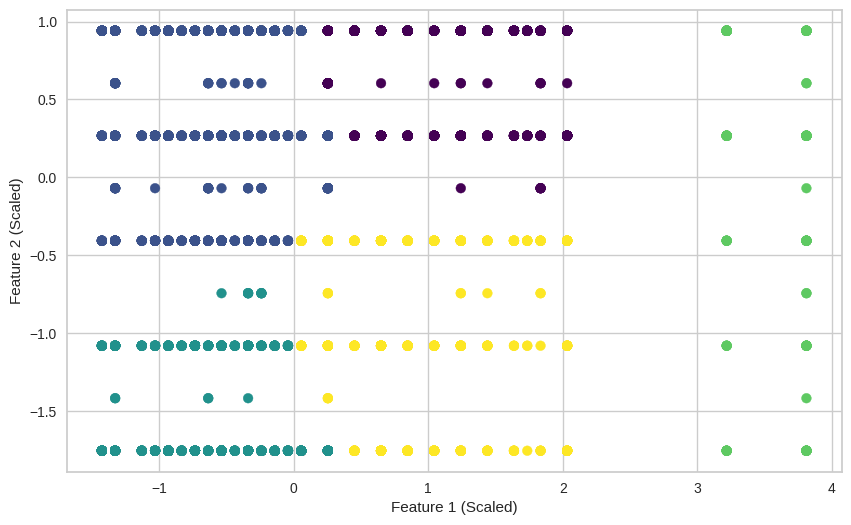

In [168]:
plt.figure(figsize=(10, 6))
plt.scatter(scaled_numerical[:, 0], scaled_numerical[:, 1], c=cluster_labels, cmap='viridis')
# plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='red')  # Centroids
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.show()

In [169]:
#statistical analysis of each cluster
clustering_data.groupby('Cluster').mean()

,Cost,Rating
Cluster,,
0,1389.774208,4.676292
1,570.059616,4.322146
2,553.772582,1.253454
3,2650.000000,3.815000
4,1312.287234,2.168617


Cluster 0: High cost, very high ratings - premium and highly rated items.

Cluster 1: Moderate cost, high ratings - good value, well-liked items.

Cluster 2: Low cost, very low ratings - low-quality or unpopular items.

Cluster 3: Very high cost, moderate ratings - expensive but not very well-received items.

Cluster 4: High cost, low ratings - expensive and low-rated items.

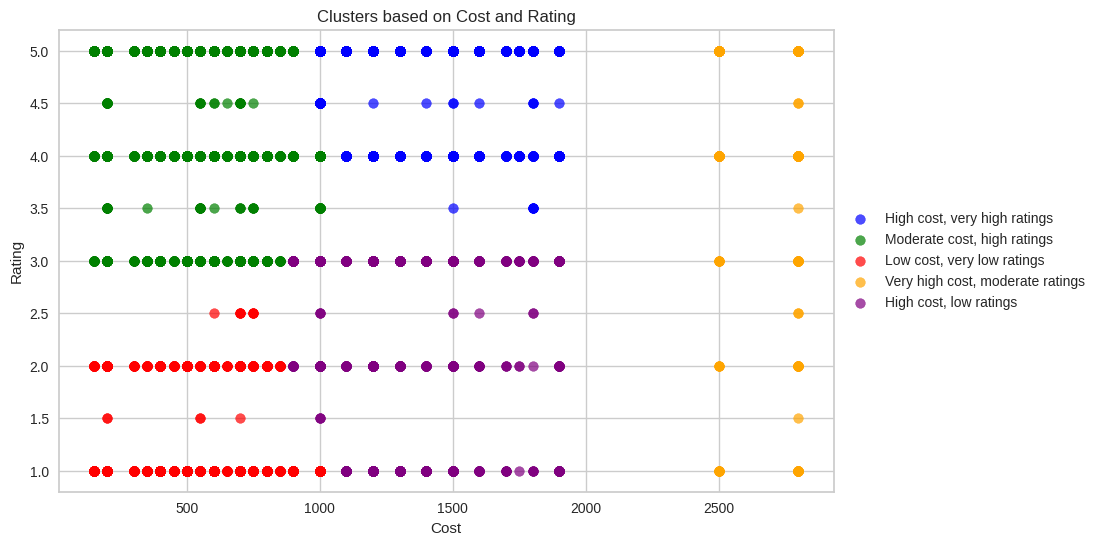

In [172]:
# Define colors for each cluster
colors = ['blue', 'green', 'red', 'orange', 'purple']

# Define cluster labels and their characteristics
cluster_labels = [
    'High cost, very high ratings',
    'Moderate cost, high ratings',
    'Low cost, very low ratings',
    'Very high cost, moderate ratings',
    'High cost, low ratings'
]

# Plot the scatter plot
plt.figure(figsize=(10, 6))
for i in range(len(cluster_labels)):
    plt.scatter(clustering_data[clustering_data['Cluster'] == i]['Cost'], clustering_data[clustering_data['Cluster'] == i]['Rating'], label=cluster_labels[i], color=colors[i], alpha=0.7)

plt.xlabel('Cost')
plt.ylabel('Rating')
plt.title('Clusters based on Cost and Rating')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The ML model used in your case is KMeans clustering. KMeans is an unsupervised learning algorithm used for clustering data into groups based on similarity. It iteratively assigns data points to clusters and updates the cluster centroids until convergence.

**Silhouette Score:** Measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). Silhouette score ranges from -1 to 1, where a higher value indicates better clustering. In our case highest value of silhouette score arrived at k = 5, we will use another metric inertia or elbow method

**Inertia:** The sum of squared distances of samples to their closest cluster center. Lower inertia indicates better clustering.In our case inertia started slowing down signficantly at =5 which proves silhouettes score was right.

### ML Model - 2 (K-means clustering of Sentiments)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

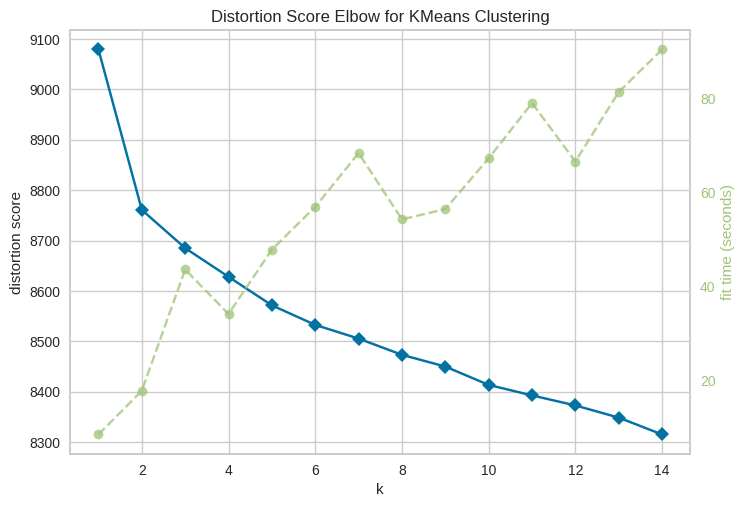

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(1,15),locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(X_pca)

# Finalize and render the figure
visualizer.show()

KElbowVisualizer identified an elbow at k=2, indicating that 2 might be the optimal number of clusters but we will also test with silhouette scores.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, silhouette score is 0.03357832294482222


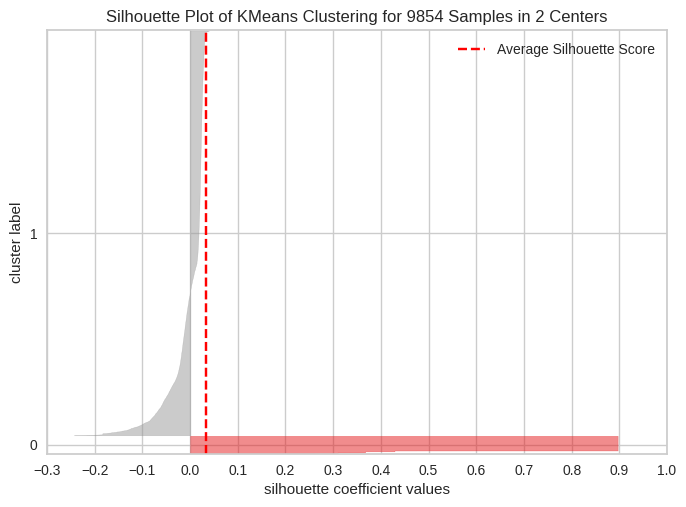

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, silhouette score is 0.03488361675869713


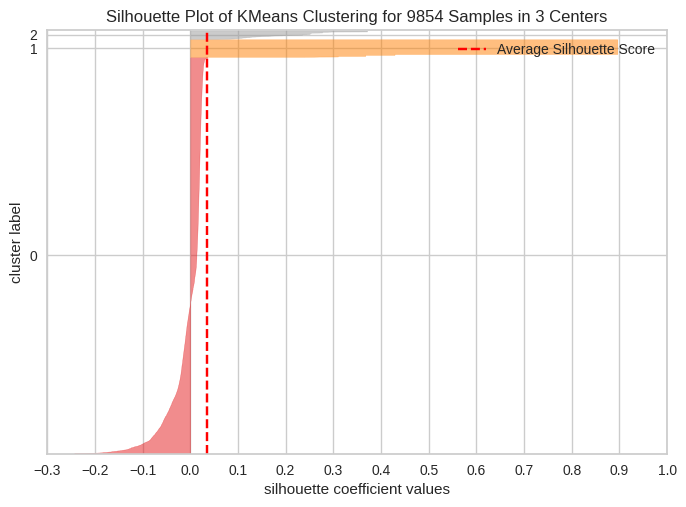

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, silhouette score is 0.028536069276805052


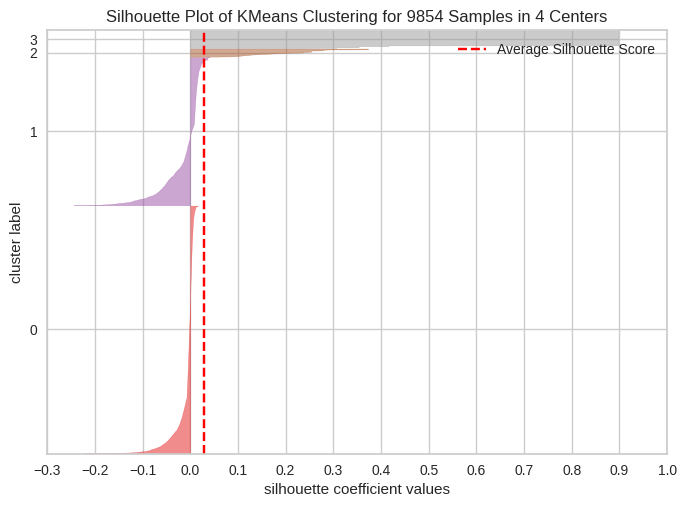

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, silhouette score is 0.028992441494551477


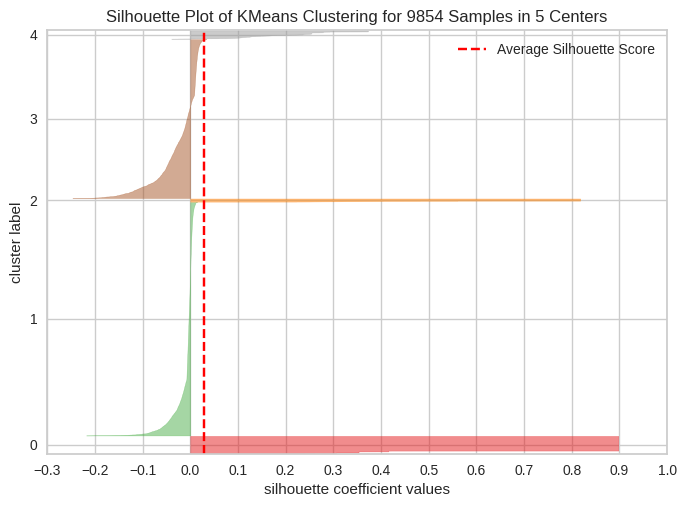

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, silhouette score is 0.029390068314632752


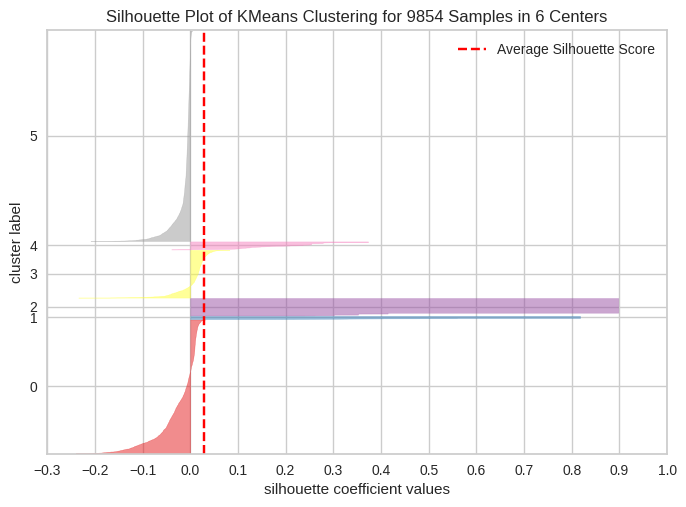

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, silhouette score is 0.03056308864316445


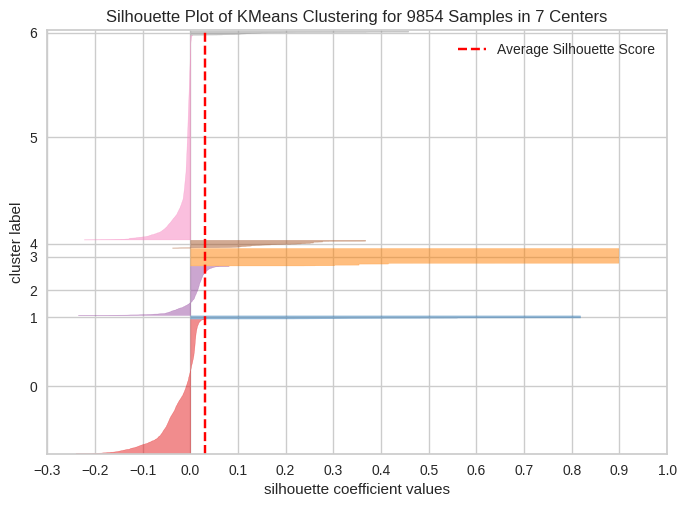

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, silhouette score is 0.03156841373543971


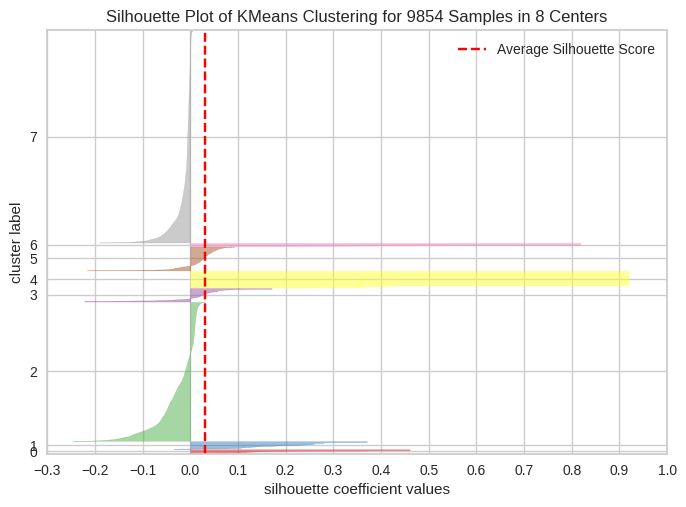

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, silhouette score is 0.031262354902001036


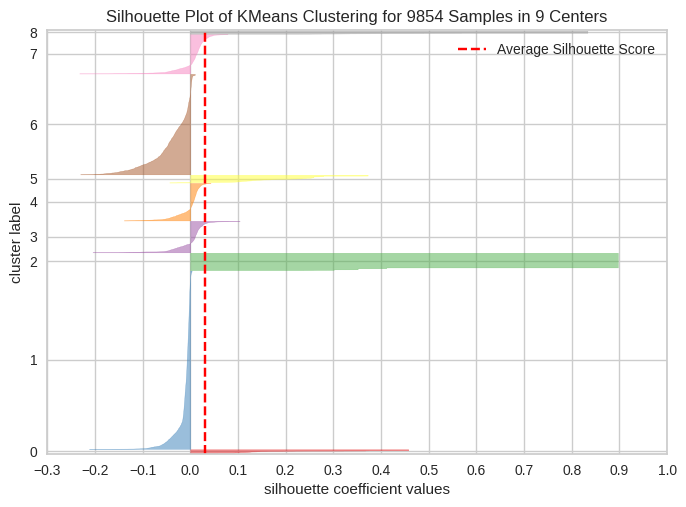

[0.03357832294482222,
 0.03488361675869713,
 0.028536069276805052,
 0.028992441494551477,
 0.029390068314632752,
 0.03056308864316445,
 0.03156841373543971,
 0.031262354902001036]

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

def silhouette_analysis(n):
    silhouette_scores = []  # List to store silhouette scores
    for n_clusters in range(2, n):
        km = KMeans(n_clusters=n_clusters)
        preds = km.fit_predict(X_pca)
        score = silhouette_score(X_pca, preds, metric='euclidean')
        silhouette_scores.append(score)  # Append silhouette score to the list
        print('For n_clusters = {}, silhouette score is {}'.format(n_clusters, score))
        visualizer = SilhouetteVisualizer(km)
        visualizer.fit(X_pca)
        visualizer.poof()
    return silhouette_scores  # Return the list of silhouette scores

# Call the silhouette_analysis function with the desired maximum number of clusters
silhouette_analysis(n=10)


Silhouette Score is also conforming elbow methods analysis 2 numbers of cluster are optimal for this data.

The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. It is used to evaluate the quality of clustering, where a higher score indicates that objects are more similar to their own cluster and dissimilar to other clusters.

The Silhouette score is low which means this data is not best suitable for clustering we will still proceed to visualise clusters to confirm this assumption.

In [ ]:
# Apply k-means with the chosen number of clusters (assuming k=2)
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Add cluster labels to the dataframe
merged_df['Cluster'] = cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


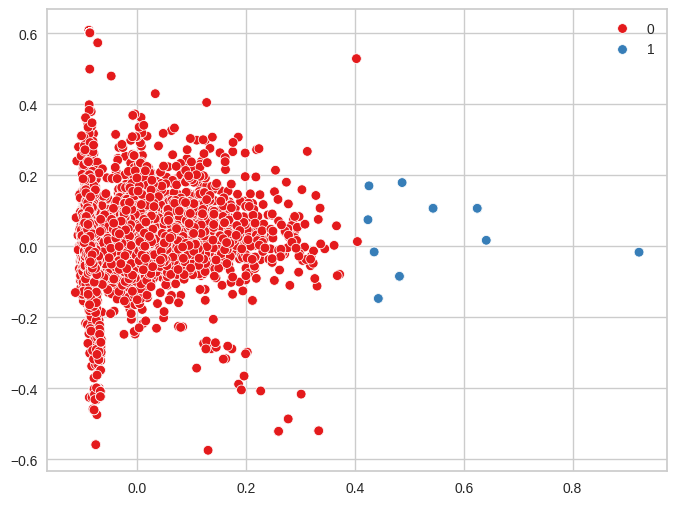

In [ ]:
# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='Set1', legend='full')
plt.legend()
plt.grid(True)
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

 The machine learning model used is K-Means clustering. K-Means is an unsupervised learning algorithm used for clustering, where it partitions data into K clusters based on similarity.

 We used Elbow method and Silhouette Scores to determine optimal number of clusters, the clustering results are not very strong, as the scores are relatively low (around 0.03). This could indicate that the clusters are overlapping or not well-separated in the reduced-dimensional space.

 Now we will use VADER(sentiment scoring) and LinearRegression to do sentiment analysis

### ML Model - 3 (Sentiment analysis using Linear Regression)

In [175]:
!pip install nltk

In [176]:
!python -m nltk.downloader vader_lexicon

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [177]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each document
merged_df['Sentiment Score'] = merged_df['Review'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Display sentiment scores for each document
print(merged_df[['Review', 'Sentiment Score']])

                                                 Review  Sentiment Score
0     ambience good food quite good saturday lunch c...           0.9669
1     ambience good pleasant evening service prompt ...           0.9360
2     must try great food great ambience thnx servic...           0.9186
3     soumen da arun great guy behavior sincerety go...           0.8591
4     food goodwe ordered kodi drumstick basket mutt...           0.9201
...                                                 ...              ...
9995  madhumathi mahajan well start nice courteous s...           0.9909
9996  place never disappointed u food courteous staf...           0.9496
9997  bad rating mainly chicken bone found veg food ...           0.9793
9998  personally love prefer chinese food couple tim...           0.9423
9999  checked try delicious chinese food seen nonveg...           0.8402

[9854 rows x 2 columns]


In [178]:
# ML Model - 3 Implementation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Combine vectorized features with sentiment scores
combined_features = np.hstack((X_pca, np.array(merged_df['Sentiment Score']).reshape(-1, 1)))

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(combined_features, merged_df['Sentiment Score'], test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict sentiment scores on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

Mean squared error: 1.912993474684778e-09


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool to calculate sentiment scores for each document in your DataFrame. VADER is a lexicon and rule-based sentiment analysis tool specifically designed for social media text, and it provides a compound sentiment score for each document.

The code utilizes a Linear Regression model for sentiment prediction. This is a supervised learning algorithm that attempts to model the relationship between independent variables (features) and a dependent variable (target variable) using a linear equation.

In this case:

Independent Variables: Combined feature matrix (X), which likely includes features extracted from the reviews and the sentiment scores generated by VADER.

Dependent Variable: Sentiment scores of the reviews (y).
The model learns the weights for each feature, and these weights determine how much each feature contributes to the predicted sentiment score.

The code uses Mean Squared Error (MSE) to evaluate the model's performance. MSE is a common metric used for regression tasks. It calculates the average squared difference between the predicted sentiment scores (y_pred) and the actual sentiment scores (y_test) in the testing set.

Lower MSE indicates better model performance. It signifies that the model's predictions are, on average, closer to the actual sentiment scores.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For clustering tasks i have used **Silhoutte Score and inertia or sum of squared distances.**
A silhouette score close to 1 indicates that the data point is well-matched to its own cluster and poorly matched to neighboring clusters. A score close to 0 indicates that the data point is on or very close to the boundary between two clusters. A score close to -1 indicates that the data point is probably assigned to the wrong cluster.

For sentiment analysis of of review text i used **Mean Squared Error (MSE)**. MSE quantifies the average squared difference between predicted and actual values. Minimizing MSE ensures that the model produces accurate predictions, which is crucial for making informed business decisions based on regression analysis.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have choosen Linear Regression which we used for sentiment analysis of reviews. The MSE value was very low which indicates better model performance. It calculates the average squared difference between the predicted sentiment scores and the actual sentiment scores(which we generated using VADER).

# **Conclusion**

**Conclusions from EDA:**

The estimated cost per person is mainly centered around 500 to 1000, with a larger number of restaurants offering this price range.

AB's - Absolute Barbecues is the highest-rated restaurant, and others should consider implementing its model.

Most restaurants offer North Indian cuisine, with modern Indian cuisine having the highest average cost and Mediterranean cuisine having the highest average rating.

A high number of restaurants offer buffet services, and Sunday brunches have the highest average cost. "Hyderabad's Hottest" has the highest rating among the categories.

For Temporal insights weekends(sundays and fridays) and  late evening hours (21,22,23) are peak activity periods.

**Conclusions from ML models:**

Implemented K-means clustering to segment restaurants on basis of cost and rating, which will help business to understand market dynamics better, allowing for more strategic and customer-centric decision-making, ultimately driving growth and competitive advantage.

For this dataset kmeans clustering is not suitable for review data which helps to understand sentiments.
Using VADER, a lexicon approach to get sentiment scores, and then applying any supervised algorithm is the recommended solution.